In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
pathresults = "../../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","

import matplotlib.ticker as mtick
import seaborn as sns
viridis = matplotlib.colormaps.get_cmap('viridis')
from matplotlib import colors

so selection:
d by 14C imaging of exudates is usually only 2–3 mm.The rhizosphere extent for most enzymes is 1–3 mm.
so try to respect it for 2mm away from surface for c and for 1mm away from surface for microbes.


In [22]:
df3D = pd.read_pickle("./soil3dData.pkl") 

In [108]:
df3D25gotR = df3D[(df3D['gotR'])&(df3D['time'].astype(int)==14)].copy().reset_index()

In [109]:
df3D25gotR

index  time  cellindx     theta            cs        cl  \
0      16539263  14.0       580  0.229098  9.732398e-07  0.000694   
1      16562015  14.0       580  0.229089  1.241761e-06  0.000778   
2      16563743  14.0       580  0.229089  1.051673e-06  0.000591   
3      16590239  14.0       581  0.229087  8.012607e-06  0.000746   
4      16607807  14.0       582  0.229099  8.086368e-07  0.000708   
...         ...   ...       ...       ...           ...       ...   
15652  41626367  14.0      1459  0.210813  4.032941e-06  0.000797   
15653  41626655  14.0      1459  0.210889  1.891391e-06  0.000799   
15654  41626943  14.0      1459  0.210886  2.437242e-06  0.000625   
15655  41627231  14.0      1459  0.210834  2.020282e-06  0.000760   
15656  41627519  14.0      1459  0.210888  7.711250e-07  0.000675   

                coa       cod           cca       ccd  ...  timeidx  gotR  \
0      5.613209e-07  0.000009  3.363961e-07  0.000009  ...      287  True   
1      6.755715e-07  0.000009  5.987472e-08  0.000009  ...      287  True   
2      3.653242e-07  0.000009  7.124052e-08  0.000009  ...      287  True   
3      8.233288e-07  0.000008  5.008659e-07  0.000009  ...      287  True   
4      1.040976e-07  0.000009  1.954158e-07  0.000010  ...      287  True   
...             ...       ...           ...       ...  ...      ...   ...   
15652  8.289757e-08  0.000009  1.139157e-06  0.000009  ...      287  True   
15653  4.492960e-08  0.000009  2.007656e-07  0.000009  ...      287  True   
15654  1.757196e-07  0.000009  3.499086e-07  0.000010  ...      287  True   
15655  6.477669e-07  0.000009  9.394475e-08  0.000009  ...      287  True   
15656  2.126622e-07  0.000009  7.561663e-08  0.000009  ...      287  True   

       pSet  depth        coordX  coordY  simulation  volscv        cc  \
0         7  -24.5  8.673617e-17    -4.5           7       1  0.000009   
1        86  -24.5  8.673617e-17    -4.5          86       1  0.000009   
2        92  -24.5  8.673617e-17    -4.5          92       1  0.000009   
3        85  -24.5  1.000000e+00    -4.5          85       1  0.000010   
4        47  -24.5 -1.000000e+00    -3.5          47       1  0.000010   
...     ...    ...           ...     ...         ...     ...       ...   
15652    94   -0.5  8.673617e-17     0.5          94       1  0.000010   
15653    95   -0.5  8.673617e-17     0.5          95       1  0.000009   
15654    96   -0.5  8.673617e-17     0.5          96       1  0.000011   
15655    97   -0.5  8.673617e-17     0.5          97       1  0.000009   
15656    98   -0.5  8.673617e-17     0.5          98       1  0.000009   

             co  
0      0.000009  
1      0.000009  
2      0.000009  
3      0.000009  
4      0.000009  
...         ...  
15652  0.000009  
15653  0.000009  
15654  0.000009  
15655  0.000009  
15656  0.000009  

[15657 rows x 22 columns]

select cells which are at the bottom: far away from the roots:

In [82]:
df3D_bulk = df3D[(df3D['depth']==min(df3D['depth']))&(df3D['time'].astype(int)==14)&(df3D['cellindx']==0)].copy().reset_index()

In [83]:
df3D_bulk

index  time  cellindx     theta            cs        cl           coa  \
0     287  14.0         0  0.244624  3.610368e-07  0.000925  1.569845e-09   
1     575  14.0         0  0.244626  2.931457e-06  0.000991  5.917690e-07   
2     863  14.0         0  0.244630  9.707359e-07  0.000712  2.369507e-08   
3    1151  14.0         0  0.244623  1.883500e-06  0.000739  9.154841e-07   
4    1439  14.0         0  0.244608  7.349813e-06  0.000819  1.864622e-06   
..    ...   ...       ...       ...           ...       ...           ...   
94  27359  14.0         0  0.244599  2.846404e-06  0.000792  2.855366e-08   
95  27647  14.0         0  0.244611  1.316758e-06  0.000794  3.493113e-09   
96  27935  14.0         0  0.244611  2.043401e-06  0.000622  4.003117e-08   
97  28223  14.0         0  0.244602  1.126869e-06  0.000755  6.421340e-07   
98  28511  14.0         0  0.244610  2.117536e-07  0.000671  1.458231e-07   

         cod           cca       ccd  ...  timeidx   gotR  pSet  depth  \
0   0.000009  3.712639e-08  0.000009  ...      287  False     0  -40.5   
1   0.000009  2.357663e-07  0.000009  ...      287  False     1  -40.5   
2   0.000009  3.974265e-08  0.000009  ...      287  False     2  -40.5   
3   0.000008  4.080463e-07  0.000009  ...      287  False     3  -40.5   
4   0.000008  2.301713e-06  0.000008  ...      287  False     4  -40.5   
..       ...           ...       ...  ...      ...    ...   ...    ...   
94  0.000009  1.084589e-06  0.000009  ...      287  False    94  -40.5   
95  0.000009  9.873336e-08  0.000009  ...      287  False    95  -40.5   
96  0.000009  2.171525e-07  0.000010  ...      287  False    96  -40.5   
97  0.000009  1.098752e-08  0.000009  ...      287  False    97  -40.5   
98  0.000009  1.665509e-08  0.000009  ...      287  False    98  -40.5   

    coordX  coordY  simulation  volscv        cc        co  
0     -1.0    -5.5           0       1  0.000009  0.000009  
1     -1.0    -5.5           1       1  0.000009  0.000009  
2     -1.0    -5.5           2       1  0.000009  0.000009  
3     -1.0    -5.5           3       1  0.000010  0.000009  
4     -1.0    -5.5           4       1  0.000010  0.000010  
..     ...     ...         ...     ...       ...       ...  
94    -1.0    -5.5          94       1  0.000010  0.000009  
95    -1.0    -5.5          95       1  0.000009  0.000009  
96    -1.0    -5.5          96       1  0.000011  0.000009  
97    -1.0    -5.5          97       1  0.000009  0.000009  
98    -1.0    -5.5          98       1  0.000009  0.000009  

[99 rows x 22 columns]

In [17]:
dfrhizo = pd.read_pickle("./dfrhizosphere_allcell.pkl") 
dfrhizo

locCylId    coords konzcs      vols  lens  reLens pSet  locCellId  \
0             0  0.054990    NaN  0.003448   1.0     1.0    0        0.0   
1             0  0.065966    NaN  0.004962   1.0     1.0    0        1.0   
2             0  0.079133    NaN  0.007141   1.0     1.0    0        2.0   
3             0  0.094928    NaN  0.010276   1.0     1.0    0        3.0   
4             0  0.113876    NaN  0.014788   1.0     1.0    0        4.0   
...         ...       ...    ...       ...   ...     ...  ...        ...   
412742      483  0.046584    NaN  0.004495   1.0     1.0   98        2.0   
412743      483  0.064973    NaN  0.008744   1.0     1.0   98        3.0   
412744      483  0.090620    NaN  0.017010   1.0     1.0   98        4.0   
412745      483  0.126391    NaN  0.033089   1.0     1.0   98        5.0   
412746      483  0.176282    NaN  0.064368   1.0     1.0   98        6.0   

             wat            cs  ...       cod           cca       ccd  \
0       0.000744  3.586009e-07  ...  0.000009  3.711420e-08  0.000009   
1       0.001071  3.585574e-07  ...  0.000009  3.711325e-08  0.000009   
2       0.001541  3.584819e-07  ...  0.000009  3.711203e-08  0.000009   
3       0.002218  3.583793e-07  ...  0.000009  3.711062e-08  0.000009   
4       0.003191  3.582561e-07  ...  0.000009  3.710913e-08  0.000009   
...          ...           ...  ...       ...           ...       ...   
412742  0.000971  5.610183e-07  ...  0.000009  2.512488e-07  0.000009   
412743  0.001889  5.610330e-07  ...  0.000009  2.512488e-07  0.000009   
412744  0.003675  5.610470e-07  ...  0.000009  2.512488e-07  0.000009   
412745  0.007149  5.610544e-07  ...  0.000009  2.512488e-07  0.000009   
412746  0.013907  5.610581e-07  ...  0.000009  2.512488e-07  0.000009   

            css2  sts  segIdx       rIn      rOut      rIn2     rOut2  
0       0.000008  0.0     0.0  0.050000  0.059980  0.000000  0.009980  
1       0.000008  0.0     0.0  0.059980  0.071952  0.009980  0.021952  
2       0.000008  0.0     0.0  0.071952  0.086314  0.021952  0.036314  
3       0.000008  0.0     0.0  0.086314  0.103542  0.036314  0.053542  
4       0.000008  0.0     0.0  0.103542  0.124210  0.053542  0.074210  
...          ...  ...     ...       ...       ...       ...       ...  
412742  0.000013  1.0   483.0  0.038906  0.054263  0.018906  0.034263  
412743  0.000013  1.0   483.0  0.054263  0.075683  0.034263  0.055683  
412744  0.000013  1.0   483.0  0.075683  0.105557  0.055683  0.085557  
412745  0.000013  1.0   483.0  0.105557  0.147224  0.085557  0.127224  
412746  0.000013  1.0   483.0  0.147224  0.205339  0.127224  0.185339  

[356977 rows x 22 columns]

In [8]:
dfmean = pd.read_pickle("./cyl10to11_4d.pkl") 
dfmean.columns

Index(['wat', 'cs', 'cl', 'coa', 'cod', 'cca', 'ccd', 'css2', 'co2', 'yX',
       'yY', 'yZ', 'vol', 'lenSeg', 'st', 'orgId', 'relLen', 'beta_C',
       'beta_O', 'C_thres,C', 'C_thres,O', 'DS_W', 'k_C,S', 'k_d,C', 'k_d,O',
       'K_L', 'k_O,S', 'k_r,C', 'k_r,O', 'm_max,C', 'm_max,O', 'p_L', 'ro_B',
       'u_max,C', 'u_max,O', 'v_max,L', 'Y', 'Y_C', 'Y_O', 'CSS_max', 'k_sorp',
       'CL_init', 'CS_init', 'pSet', 'simTime', 'co', 'cc'],
      dtype='object')

In [4]:
dfmean[['cs','cl']]

cs        cl
0      3.580200e-07  0.000910
1      3.545819e-07  0.000863
2      4.191260e-07  0.000798
3      3.552012e-07  0.000800
4      3.021884e-05  0.000931
...             ...       ...
45856  7.993337e-07  0.000675
45857  3.608405e-06  0.000675
45858  2.021994e-06  0.000675
45859  2.123169e-07  0.000675
45860  5.610611e-07  0.000675

[45861 rows x 2 columns]

In [84]:


#outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
#column_names = outputvalsname + paramsets.columns.tolist()
def getnewval(df):
    #outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
    #column_names = outputvalsname + paramsets.columns.tolist()
    try:
        df['css']=df['css2']
    except:
        pass
    df['cxd']=df['cod']+df['ccd']
    df['cxa']=df['coa']+df['cca']
    df['co'] = df['cod']+df['coa']
    df['cc'] = df['ccd']+df['cca']
    df['cx']=df['co']+df['cc']
    df['cxd_cx']=df['cxd']/df['cx']
    df['cxa_cx']=df['cxa']/df['cx']
    try:
        df['theta']=df['wat']/df['vols']
    except:
        try:
            df['theta']=df['wat']/df['vol']
        except:
            pass
        pass
    #df  = pd.merge(df, paramsets[['pSet', 'theta_th']], on="pSet")
    #df['csBis'] = df['cs']*df['theta']/df['theta_th']
    #df['clBis'] = df['cl']*df['theta']/df['theta_th']
    # per unit of soil volume
    df['cs_'] = df['cs']*df['theta']
    df['cl_'] = df['cl']*df['theta']
    #df.loc[df['scenario'] == "earlyDry",'scenario']="earlyDry"  # Select subset where 'pSet' equals the current value
    
    solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
    solidMolarMass = 60.08e-3 # [kg/mol] 
    thetaS= 0.43
    mgC_per_molC=12.011*1000
    
    massBulkDensity = solidDensity*(1.- thetaS) *1000 /1e6 # [kg/m^3 scv] * [g/kg] * [m3/cm3] = g/cm3
    #df['pSet']=df['scenario']+'_'+df['pSet']

    # mol/cm3 scv to mg C pool/g C mineral
    if False:
        for nnn in ['cs_','cl_','co','cc','coa','cod','cca','ccd','css2']:
            # mol C/cm3 *  
            df[nnn+'_mass'] = df[nnn]*mgC_per_molC / massBulkDensity
    return df
df3D_bulk = getnewval(df3D_bulk)
dfrhizo = getnewval(dfrhizo)
dfmean = getnewval(dfmean)
pSet2Keep =[17,38,44,85]#[17,38,44,85]

In [90]:
for val in ['cx','cxa','co','cc','cs','cl']:
    dfmean[val+'_bulk'] = np.nan
    for pp in range(99):
        dfmean.loc[dfmean['pSet']==pp, val+'_bulk'] =float( df3D_bulk.loc[df3D_bulk['pSet']==pp, val])


# conditions rhizosphere

In [19]:
dfrhizo1mm = dfrhizo[dfrhizo['rOut2']<=0.1] # for microorganisms

In [36]:
dfrhizo2mm = dfrhizo[dfrhizo['rOut2']<=0.2] # for microorganisms

In [23]:
dfrhizo1mm['cx']

0         0.000019
1         0.000019
2         0.000019
3         0.000019
4         0.000019
            ...   
412740    0.000019
412741    0.000019
412742    0.000019
412743    0.000019
412744    0.000019
Name: cx, Length: 280830, dtype: float64

# conditions rhizosphere--microorganisms
C1: Co + Cc in [0.04, 1.2] mg C / cm3 soil 
C2: (Co + Cc)

In [40]:
# conditions rhizosphere
# C1
limMBr = np.array([0.04, 1.2])/12*1e-3 # MBr, mol/cm3
#limCoCc
# C2
limMBrMBb =  np.array([1, 2.5]) # MBr/MBb
# C3
limSOCr =  np.array([4, 16])/12*1e-3  # *1/4 # SOCr
# C4
limSOCrb =   np.array([0.66,2]) # SOCr/SOCb
# C5
limMBraMBr =    np.array([6e-4,0.6])
# C6
limcs =    np.array([0,0.55])/12*1e-3 
# C7
limcsRcsB=  np.array([1,np.Inf])
# C8
limMBcorMBcoB =   np.array([1,np.Inf])
# C9
limMBCrMBOr =   np.array([1,np.Inf])

In [50]:
# check c1
errorC1 = set( dfrhizo1mm[(dfrhizo1mm['cx'] < limMBr[0])|(dfrhizo1mm['cx'] > limMBr[1])]['pSet'])
print(repr(errorC1))
print(len(errorC1))
# check c2
errorC2 = set( dfrhizo1mm[(dfrhizo1mm['cx'] < limMBr[0])|(dfrhizo1mm['cx'] > limMBr[1])]['pSet'])
# check c3
errorC3 = set( dfrhizo2mm[(dfrhizo2mm['cs'] +dfrhizo2mm['cl'] < limSOCr[0])|(dfrhizo2mm['cs'] +dfrhizo2mm['cl'] > limSOCr[1])]['pSet'])
print(repr(errorC3))
print(len(errorC3))
#
print('c1c3',len(errorC1.union(errorC3)))
# check c5
errorC5 = set( dfrhizo1mm[(dfrhizo1mm['cxa']/dfrhizo1mm['cx'] < limMBraMBr[0])|(dfrhizo1mm['cxa']/dfrhizo1mm['cx'] > 0.9)]['pSet'])
print(repr(errorC5))
print(len(errorC5))


{0, 1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 56, 57, 58, 63, 64, 65, 66, 67, 69, 71, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 86, 87, 88, 89, 90, 92, 93, 95, 96, 97, 98}
77
{0, 1, 9, 10, 16, 34, 35, 39, 40, 42, 43, 51, 55, 62, 63, 64, 67, 71, 73, 74, 78, 80, 82, 84, 85, 86, 91, 93, 94}
29
c1c3 84
{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98}
93


In [93]:
print(min(dfmean['cx']/dfmean['cx_bulk']), max(dfmean['cx']/dfmean['cx_bulk']))

0.9957262171451878 18.44813133807565


In [104]:
# check c1
print('c1')
errorC1 = set( dfmean[(dfmean['cx'] < limMBr[0])|(dfmean['cx'] > limMBr[1])]['pSet'])
print(repr(errorC1))
print(len(errorC1))
# check c2
print('c2')
errorC2 = set( dfmean[(dfmean['cx']/dfmean['cx_bulk'] < limMBrMBb[0]*0.9)|(dfmean['cx']/dfmean['cx_bulk'] > limMBrMBb[1])]['pSet'])
print(repr(errorC2))
print(len(errorC2))
# check c3
print('c3')
errorC3 = set( dfmean[(dfmean['cs'] +dfmean['cl'] < limSOCr[0])|(dfmean['cs'] +dfmean['cl'] > limSOCr[1])]['pSet'])
print(repr(errorC3))
print(len(errorC3))
# check c4
print('c4')
errorC4 = set( dfmean[((dfmean['cs'] +dfmean['cl'])/(dfmean['cs_bulk'] +dfmean['cl_bulk']) < limSOCrb[0])|
                      ((dfmean['cs'] +dfmean['cl'])/(dfmean['cs_bulk'] +dfmean['cl_bulk']) > limSOCrb[1])]['pSet'])
print(repr(errorC4))
print(len(errorC4))
# check c5
print('c5')
errorC5 = set( dfmean[(dfmean['cxa']/dfmean['cx'] < limMBraMBr[0])|(dfmean['cxa']/dfmean['cx'] > limMBraMBr[1])]['pSet'])
print(repr(errorC5))
print(len(errorC5))
# check c6
print('c6')
errorC6 = set( dfmean[(dfmean['cs'] < limcs[0])|(dfmean['cs'] > limcs[1])]['pSet'])
print(repr(errorC6))
print(len(errorC6))
# check c7
print('c7')
errorC7 = set( dfmean[(dfmean['cs'] <dfmean['cs_bulk']*0.9)]['pSet'])
print(repr(errorC7))
print(len(errorC7))
# check c8
print('c8')
errorC8 = set( dfmean[(dfmean['cc']/dfmean['co'] )<(dfmean['cc_bulk']/dfmean['co_bulk'] )*0.9]['pSet'])
print(repr(errorC8))
print(len(errorC8))
# check c9
print('c9')
errorC9 = set( dfmean[(dfmean['co'] > dfmean['cc'])]['pSet'])
print(repr(errorC9))
print(len(errorC9))

errorSets = set.union(errorC1,errorC2, errorC3, errorC4,errorC5, errorC6,errorC7,errorC8,errorC9)
survivorSets =set.difference( set([i for i in range(99)]),errorSets)
print('errorsets',len(errorSets), 'survivor',len(survivorSets),survivorSets)

c1
{40, 74, 12, 13, 44, 57}
6
c2
{32, 6, 40, 74, 11, 12, 13, 44, 91, 17, 51, 84, 54, 56, 25, 27, 57}
17
c3
{64, 1, 34, 35, 67, 39, 40, 9, 71, 74, 78, 80, 84, 55, 91, 93, 63}
17
c4
set()
0
c5
{0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 14, 15, 16, 18, 19, 20, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 48, 50, 51, 52, 54, 59, 61, 63, 64, 65, 66, 67, 68, 71, 77, 78, 79, 80, 81, 82, 87, 90, 91, 93}
60
c6
{1, 2, 68, 39, 8, 9, 71, 14, 18, 61, 28, 29, 30, 63}
14
c7
{89, 96, 34, 69, 42, 74, 12, 13, 44, 75, 76, 56, 25, 27, 57}
15
c8
{31}
1
c9
{0, 10, 14, 24, 25, 31, 32, 35, 39, 41, 50, 59, 62, 64, 66, 74, 79, 82, 86, 97, 98}
21
errorsets 82 survivor 17 {5, 70, 7, 72, 73, 47, 92, 49, 83, 21, 53, 85, 88, 58, 60, 94, 95}


In [135]:
list_survivors = list(survivorSets)
list_survivors.sort()
print(repr(list_survivors))

[5, 7, 21, 47, 49, 53, 58, 60, 70, 72, 73, 83, 85, 88, 92, 94, 95]


In [106]:
df = dfmean

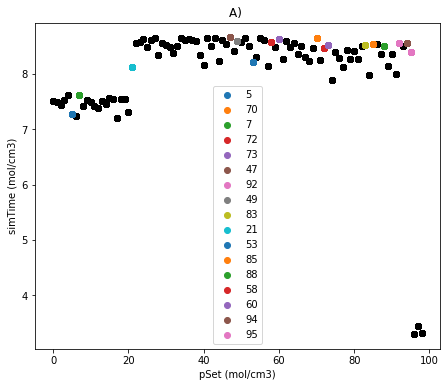

In [107]:
xname = 'pSet'
yname='simTime'
plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)

unique_values = df["pSet"].drop_duplicates()

for value in unique_values:
    subset = df[df["pSet"] == value]  
    
    plt.scatter(subset[xname], subset[yname]/(3600), alpha=0.5, 
                c = 'k'
               )
for value in survivorSets:#[17,38,44,85]:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

    plt.scatter(subset[xname], subset[yname]/(3600), alpha=1, 
                label=f'{value}',
                zorder=100#color_map[value]
               )

plt.legend()
plt.xlabel(xname + ' (mol/cm3)')
plt.ylabel(yname+' (mol/cm3)')
plt.show()


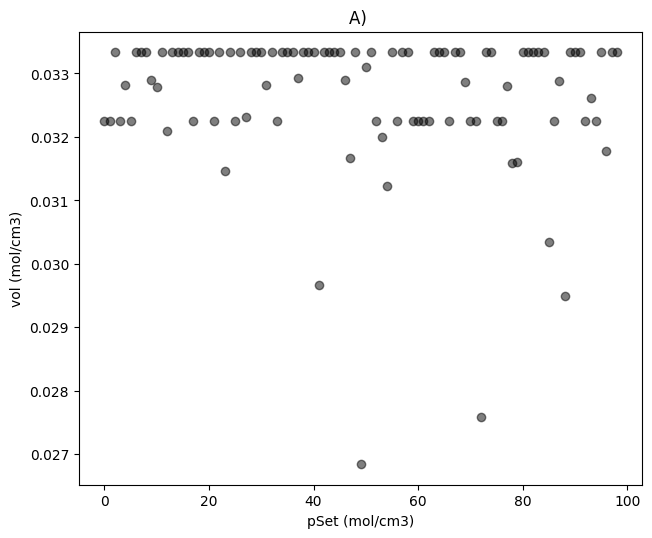

In [44]:
xname = 'pSet'
yname='vol'
plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)

unique_values = df["pSet"].drop_duplicates()

for value in unique_values:
    subset = df[df["pSet"] == value]  
    
    
    plt.scatter(value,min( subset[yname]), alpha=0.5, 
                c = 'k'
               )
if False:
    for value in [17,38,44,85]:
        subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

        plt.scatter(subset[xname], subset[yname]/(3600), alpha=1, 
                    label=f'{value}',
                    zorder=100#color_map[value]
                   )

    plt.legend()
plt.xlabel(xname + ' (mol/cm3)')
plt.ylabel(yname+' (mol/cm3)')
plt.show()


psetCaCxa {0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 14, 15, 16, 18, 19, 20, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 48, 50, 51, 52, 54, 59, 61, 63, 64, 65, 66, 67, 68, 71, 77, 78, 79, 80, 81, 82, 87, 90, 91, 93} psetCaCxb set() pSethighC {1, 2, 68, 39, 8, 9, 71, 14, 18, 61, 28, 29, 30, 63} pSethighCsCl set() pSetlowCsCl set() pSetLowCoCc set() pSethighCoCc {40, 74, 12, 13, 44, 57} pSethighCoCcBis {0, 10, 14, 24, 25, 31, 32, 35, 39, 41, 50, 59, 62, 64, 66, 74, 79, 82, 86, 97, 98}
survivors 29


In [41]:
repr(pSethighCoCcBis)

'{0, 10, 14, 24, 25, 31, 32, 35, 39, 41, 50, 59, 62, 64, 66, 74, 79, 82, 86, 97, 98}'

In [35]:
survivors = (allset-psetCaCxa-pSethighC-pSethighCsCl-\
              pSetlowCsCl-pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

In [36]:
[i for i in [17,38,44,85] if i in survivors ]

[17, 85]

In [38]:
print(set(allset),#'\npsetCaCxa\n',set(psetCaCxa), 
      #'\n\npSethighC',set(pSethighC), 
      #'\n\npSetLowCoCc\n',set(pSetLowCoCc),
     # '\n\npSethighCoCc\n',set(pSethighCoCc),
      '\n\npSethighCoCcBis\n',set(pSethighCoCcBis)
     )
print(survivors)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98} 

pSethighCoCcBis
 {0, 64, 66, 10, 74, 14, 79, 82, 86, 24, 25, 31, 32, 97, 98, 35, 39, 41, 50, 59, 62}
{5, 7, 17, 21, 27, 34, 42, 47, 49, 53, 55, 56, 58, 60, 69, 70, 72, 73, 75, 76, 83, 84, 85, 88, 89, 92, 94, 95, 96}


In [ ]:
set(pSethighCoCcBis)

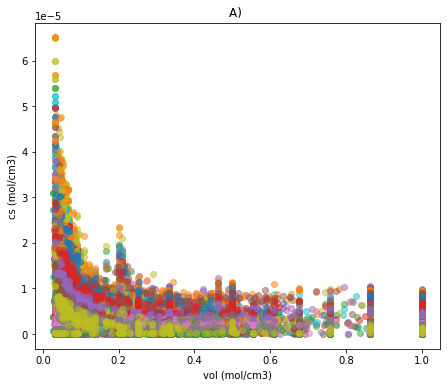

In [11]:
markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
def XvsY(df, xname, yname,unique_values=None):
    doBlack = False
    if unique_values is None:
        doBlack = True
        unique_values = df["pSet"].drop_duplicates()
    rgb_values = sns.color_palette("Set2", 99)
    color_map = dict(zip(df['pSet'].drop_duplicates(),rgb_values))
    #markers_map = dict(zip(df['scenario' ].drop_duplicates(),markers))

    for value in unique_values:
        subset = df[df["pSet"] == value]  # Select subset where 'pSet' equals the current value
        col =color_map[subset['pSet'].unique()[0]]
        edgecolors=  (0.0, 0.0, 0.0)
        if False:#doBlack:
            if value in pSet2Keep:
                col = (0.0, 0.0, 0.0)
                edgecolors=  (1,1,1)
        col = colors.to_hex(col)
        #mm = markers_map[subset['scenario'].unique()[0]]
        plt.scatter(subset[xname],subset[yname],# subset[yname], 
                    alpha=0.5, 
                    #c = col,#marker=mm,
                    label=f'{value}' #color_map[value]
                   )
    if False:#doBlack:
        for value in pSet2Keep:
            subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

            col = (0.0, 0.0, 0.0)
            edgecolors=  (1,1,1)
            col = colors.to_hex(col)
            plt.scatter(subset['vol'], subset['cxa']/subset['cx'], alpha=1, 
                        c = col ,
                        zorder=100#color_map[value]
                       )
    
    #plt.legend()
    # Add labels and legend
    plt.xlabel(xname + ' (mol/cm3)')
    plt.ylabel(yname+' (mol/cm3)')
    #plt.xlabel('cc (mg C/g soil mineral)')
    #plt.ylabel('co (mg C/g soil mineral)')

    #plt.show()
    
plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)
XvsY(dfmean,'vol','cs')

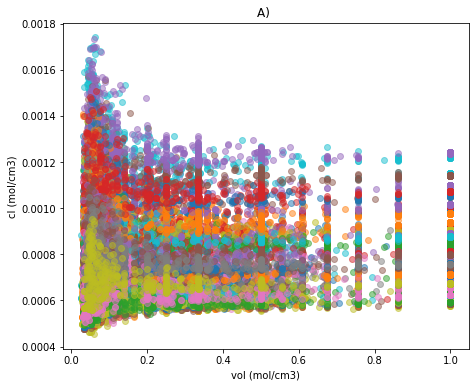

In [12]:

plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)
XvsY(dfmean,'vol','cl')

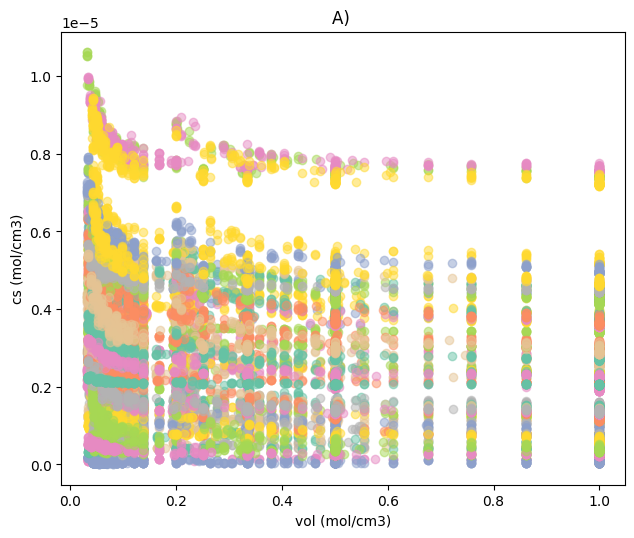

In [400]:
markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
def XvsY(df, xname, yname,unique_values=None):
    doBlack = False
    if unique_values is None:
        doBlack = True
        unique_values = survivors#df["pSet"].drop_duplicates()
    rgb_values = sns.color_palette("Set2", 99)
    color_map = dict(zip(df['pSet'].drop_duplicates(),rgb_values))
    #markers_map = dict(zip(df['scenario' ].drop_duplicates(),markers))

    for value in unique_values:
        subset = df[df["pSet"] == value]  # Select subset where 'pSet' equals the current value
        col =color_map[subset['pSet'].unique()[0]]
        edgecolors=  (0.0, 0.0, 0.0)
        if False:#doBlack:
            if value in pSet2Keep:
                col = (0.0, 0.0, 0.0)
                edgecolors=  (1,1,1)
        col = colors.to_hex(col)
        #mm = markers_map[subset['scenario'].unique()[0]]
        plt.scatter(subset[xname], subset[yname], alpha=0.5, 
                    c = col,#marker=mm,
                    label=f'{value}' #color_map[value]
                   )
    if False:#doBlack:
        for value in pSet2Keep:
            subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

            col = (0.0, 0.0, 0.0)
            edgecolors=  (1,1,1)
            col = colors.to_hex(col)
            plt.scatter(subset['cc'], subset['co'], alpha=1, 
                        c = col ,
                        zorder=100#color_map[value]
                       )
    
    #plt.legend()
    # Add labels and legend
    plt.xlabel(xname + ' (mol/cm3)')
    plt.ylabel(yname+' (mol/cm3)')
    #plt.xlabel('cc (mg C/g soil mineral)')
    #plt.ylabel('co (mg C/g soil mineral)')

    #plt.show()

plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)
XvsY(df,'vol','cs')

Fitted parameters: a = 5.070611571212303e-06, b = 24.231699952683627, c = 3.1112095157104525e-06
covariance [2.87383857e-07 1.33703443e+00 2.85650507e-08] 5821155624618541.0
r_squared 0.882139871799635


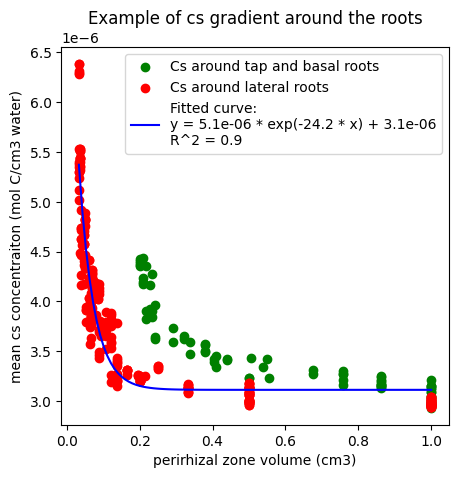

initial slope 0.0001228695381702222


In [402]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# [list( survivors)[0]]
# Sample data
df_data = df[(df['pSet']==list( survivors)[0])&((df['st']==1)|((df['st']==2)))]
x_data = df_data['vol']
y_data = df_data['cs']


df_data_ = df[(df['pSet']==list( survivors)[0])&((df['st']!=1)&((df['st']!=2)))]
x_data_ = df_data_['vol']
y_data_ = df_data_['cs']

# Define a negative exponential function
def negative_exponential(x,a,  b, c):
    return a * np.exp(-b * x) + c

# Use curve_fit to find the best parameters
# Provide initial guesses for a and b
initial_guess = [max(y_data)-min(y_data), 2, min(y_data)]
params, covariance = curve_fit(negative_exponential, x_data, y_data, p0=initial_guess)

# Extract the parameters
a_fit, b_fit, c_fit = params

print(f"Fitted parameters: a = {a_fit}, b = {b_fit}, c = {c_fit}")

# Plot the data and the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)  # Finer x range for a smooth curve
y_fit = negative_exponential(x_fit, a_fit, b_fit, c_fit)


print('covariance',np.sqrt(np.diag(covariance)),np.linalg.cond(covariance)) 
# over parametrized...
residuals = y_data- negative_exponential(x_data, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print('r_squared',r_squared) # but accurate


plt.scatter(x_data_, y_data_, label="Cs around tap and basal roots", color='g') 
plt.scatter(x_data, y_data, label="Cs around lateral roots", color='r')  # Original data
#
plt.plot(x_fit, y_fit, 
         label=f"Fitted curve:\ny = {a_fit:.1e} * exp(-{b_fit:.1f} * x) + {c_fit:.1e}\nR^2 = {r_squared:.1f}", color='b')  # Fitted curve
plt.xlabel("perirhizal zone volume (cm3)")
plt.ylabel("mean cs concentraiton (mol C/cm3 water)")
plt.title("Example of cs gradient around the roots")
plt.legend()
plt.show()

# derivatie : y' = -a *b exp(-b*x)
# y'(0) = -a*b id the initial slope
print('initial slope', a_fit * b_fit)

In [348]:
56 in survivors

True

for pset 27 r_squared 3.660791381143724e-08 initial slope 4.540490576271393e-12


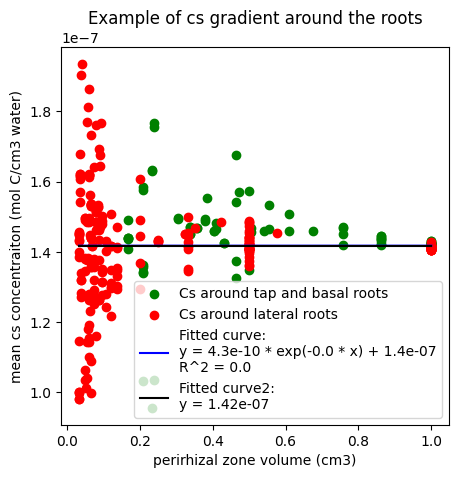

for pset 34 r_squared 0.18639955495901595 initial slope 1.1621007194673044e-07


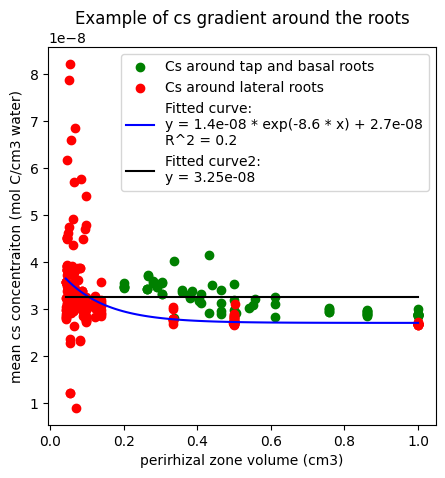

for pset 38 r_squared 0.06100325073996771 initial slope 4.4851431352863775e-06


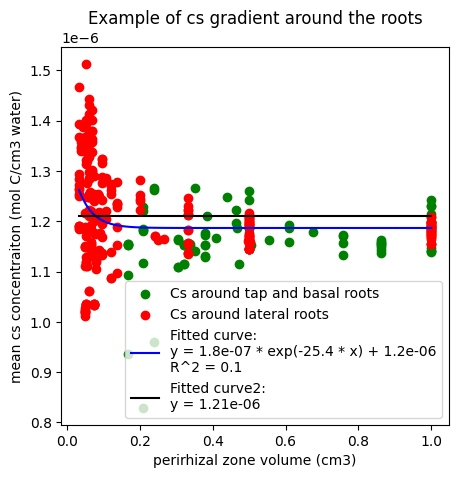

for pset 45 r_squared 0.7135696069009154 initial slope 4.8874455528420796e-06


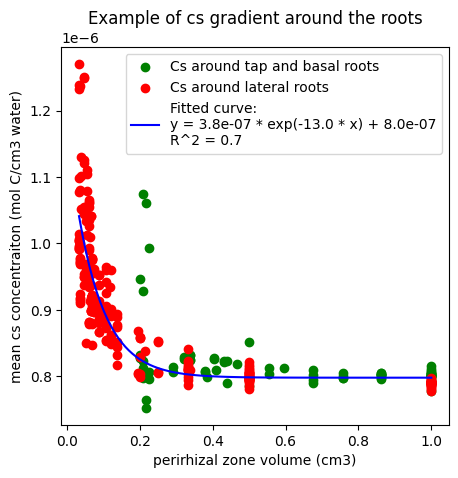

for pset 47 r_squared 0.6040462358439396 initial slope 1.2119421433933683e-05


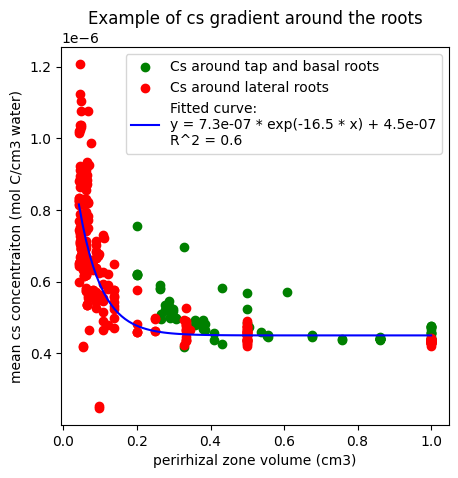

for pset 56 r_squared 0.2187302337143916 initial slope -386273024.9730532


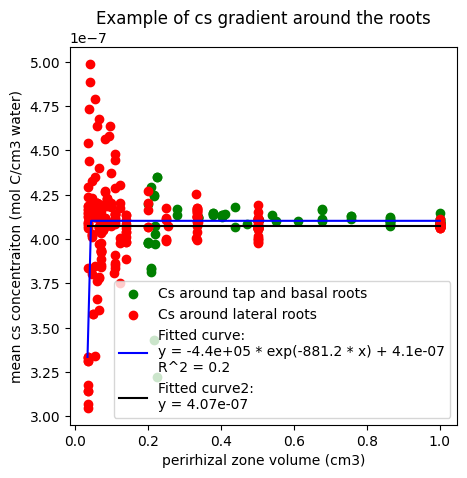

for pset 60 r_squared 0.6471523263167953 initial slope 1.372925777706207e-05


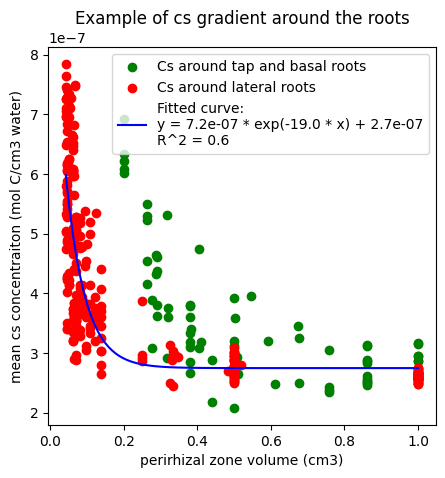

In [403]:
        
# Define a negative exponential function
def negative_exponential(x,a,  b, c):
    return a * np.exp(-b * x) + c

def constant(b,x):
    return np.full(x.shape,b)

def getInitcurve(df, psets= survivors):

    df['cs_slope'] = np.nan
    df['r_squared'] = np.nan
    for pepe in survivors:#df['pSet'].unique():
        # Sample data
        df_data = df[(df['pSet']==pepe)&((df['st']==1)|((df['st']==2)))]
        x_data = df_data['vol']
        y_data = df_data['cs']
        
        df_data_ = df[(df['pSet']==pepe)&((df['st']!=1)&((df['st']!=2)))]
        x_data_ = df_data_['vol']
        y_data_ = df_data_['cs']

        # Use curve_fit to find the best parameters
        # Provide initial guesses for a and b
        initial_guess = [max(y_data)-min(y_data), 2, min(y_data)]
        params, covariance = curve_fit(negative_exponential, x_data, y_data, p0=initial_guess)

        # Extract the parameters
        a_fit, b_fit, c_fit = params


        # Plot the data and the fitted curve
        x_fit = np.linspace(min(x_data), max(x_data), 100)  # Finer x range for a smooth curve
        y_fit = negative_exponential(x_fit, a_fit, b_fit, c_fit)
        residuals = y_data- negative_exponential(x_data, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y_data-np.mean(y_data))**2)
        r_squared = 1 - (ss_res / ss_tot)

        cs_slope = a_fit * b_fit
        
        if r_squared < 0.6:
            print('for pset',pepe, 'r_squared',r_squared,'initial slope', a_fit * b_fit)
            plt.scatter(x_data_, y_data_, label="Cs around tap and basal roots", color='g') 
            plt.scatter(x_data, y_data, label="Cs around lateral roots", color='r')  # Original data
            #
            plt.plot(x_fit, y_fit, 
                     label=f"Fitted curve:\ny = {a_fit:.1e} * exp(-{b_fit:.1f} * x) + {c_fit:.1e}\nR^2 = {r_squared:.1f}", color='b')  # Fitted curve

            

            # Plot the data and the fitted curve
            x_fit = np.linspace(min(x_data), max(x_data), 100)  # Finer x range for a smooth curve
            
            y_fit = constant(np.mean(y_data),x_fit)
            
            plt.plot(x_fit, y_fit, 
                     label=f"Fitted curve2:\ny = {np.mean(y_data):.2e}", color='k')  # Fitted curve

            
            plt.xlabel("perirhizal zone volume (cm3)")
            plt.ylabel("mean cs concentraiton (mol C/cm3 water)")
            plt.title("Example of cs gradient around the roots")
            plt.legend()
            plt.show()
            cs_slope = 0
            r_squared= 1
            
            
        if r_squared < 0.8:
            print('for pset',pepe, 'r_squared',r_squared,'initial slope', a_fit * b_fit)
            plt.scatter(x_data_, y_data_, label="Cs around tap and basal roots", color='g') 
            plt.scatter(x_data, y_data, label="Cs around lateral roots", color='r')  # Original data
            #
            plt.plot(x_fit, y_fit, 
                     label=f"Fitted curve:\ny = {a_fit:.1e} * exp(-{b_fit:.1f} * x) + {c_fit:.1e}\nR^2 = {r_squared:.1f}", color='b')  # Fitted curve

            

            
            plt.xlabel("perirhizal zone volume (cm3)")
            plt.ylabel("mean cs concentraiton (mol C/cm3 water)")
            plt.title("Example of cs gradient around the roots")
            plt.legend()
            plt.show()

        df.loc[(df['pSet']==pepe), 'cs_slope']= cs_slope
        df.loc[(df['pSet']==pepe),'r_squared'] = r_squared
        
getInitcurve(df)

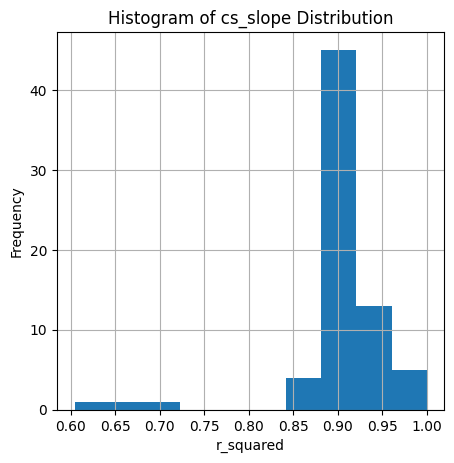

In [404]:
df_temp = df[['pSet','cs_slope','r_squared']].drop_duplicates()

# Create a histogram from the 'age' column
df_temp['r_squared'].hist()  # You can adjust 'bins' for more or less granularity

# Adding labels and title for better visualization
plt.xlabel('r_squared')
plt.ylabel('Frequency')
plt.title('Histogram of cs_slope Distribution')

# Show the histogram
plt.show()
df_temp = df[['pSet','cs_slope','r_squared']].drop_duplicates()

In [351]:
print(df_temp[abs(df_temp['cs_slope']-0.0001) == np.nanmin(abs(df_temp['cs_slope']-0.0001) )],
     df_temp[abs(df_temp['cs_slope']-0.00006) == np.nanmin(abs(df_temp['cs_slope']-0.00006) )],
     df_temp[df_temp['cs_slope'] == np.nanmax(df_temp['cs_slope'])])

      pSet  cs_slope  r_squared
24119   73    0.0001   0.909159       pSet  cs_slope  r_squared
13105   40  0.000061   0.916122      pSet  cs_slope  r_squared
5587   17  0.000205   0.896802


In [352]:
print(
    repr(np.array(list(df_temp.loc[
        (df_temp['cs_slope']>0.00009)&(df_temp['cs_slope']<0.000124),'pSet']))))

array([ 1, 12, 19, 22, 26, 30, 51, 54, 58, 63, 67, 68, 71, 72, 73, 77, 81,
       85, 90, 94])


In [353]:
print(
    repr(np.array(list(df_temp.loc[
        (df_temp['cs_slope']>0.00005)&(df_temp['cs_slope']<0.000075),'pSet']))))

array([ 5, 13, 16, 23, 40, 46, 52, 53, 57, 70, 92])


In [354]:
df_temp.loc[df_temp['pSet']==44,'cs_slope']

14431    0.000015
Name: cs_slope, dtype: float64

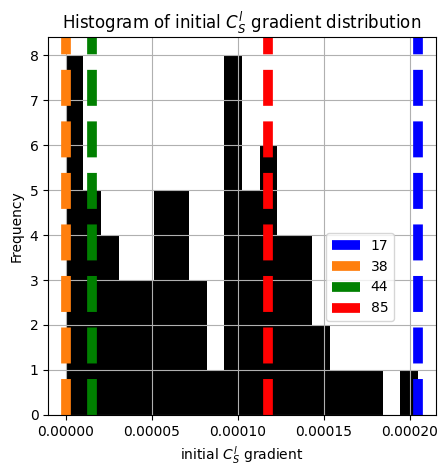

In [453]:

#df_temp = df_temp[df_temp['pSet']!=56]
# Create a histogram from the 'age' column
df_temp['cs_slope'].hist(bins = 20, color ='k')  # You can adjust 'bins' for more or less granularity
plt.axvline(x=df_temp.loc[df_temp['pSet']==17,'cs_slope'].unique()[0], 
            label= "17",color='blue',  linewidth=7, 
            linestyle='--')
plt.axvline(x=df_temp.loc[df_temp['pSet']==38,'cs_slope'].unique()[0], 
            label= "38",color='tab:orange',  linewidth=7, 
            linestyle='--')
plt.axvline(x=df_temp.loc[df_temp['pSet']==44,'cs_slope'].unique()[0], 
            label= "44",color='g',  linewidth=7, 
            linestyle='--')
plt.axvline(x=df_temp.loc[df_temp['pSet']==85,'cs_slope'].unique()[0], 
            label= "85",color='r', linewidth=7, 
            linestyle='--')
#for ii in [27,34, 42, 45, 48, 56, 60]:
#    plt.axvline(x=df_temp.loc[df_temp['pSet']==ii,'cs_slope'].unique()[0], 
#                color='k', linestyle='--')
#plt.axvline(x=0.000124, 
#            color='k', linestyle='--')
#plt.axvline(x=0.00009, 
#            color='k', linestyle='--')
#plt.axvline(x=0.00005, 
#            color='y', linestyle='--')
#plt.axvline(x=0.000075, 
#            color='y', linestyle='--')
# Adding labels and title for better visualization
plt.legend(bbox_to_anchor=(0.7, 0.5))
plt.xlabel('initial $C_S^l$ gradient')
plt.ylabel('Frequency')
plt.title('Histogram of initial $C_S^l$ gradient distribution')

# Show the histogram
plt.savefig('histcsslopte.png')
plt.show()

In [389]:
repr(np.array(df_temp.loc[df_temp['cs_slope']>0.000075,'pSet']))

'array([1, 3, 4, 6, 7, 8, 12, 17, 18, 19, 22, 26, 28, 30, 33, 37, 49, 51,\n       54, 58, 61, 63, 65, 67, 68, 71, 72, 73, 77, 81, 84, 85, 88, 90, 93,\n       94], dtype=object)'

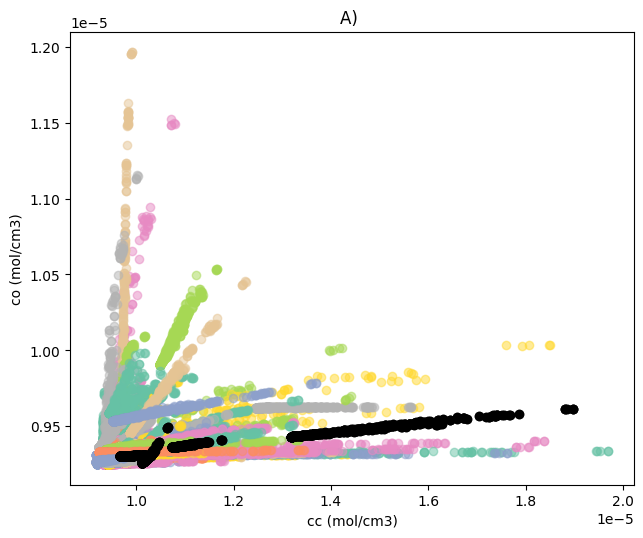

In [407]:

markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
def olgvscopo(df, unique_values=None):
    doBlack = False
    if unique_values is None:
        doBlack = True
        unique_values = df["pSet"].drop_duplicates()
    rgb_values = sns.color_palette("Set2", 99)
    color_map = dict(zip(df['pSet'].drop_duplicates(),rgb_values))
    #markers_map = dict(zip(df['scenario' ].drop_duplicates(),markers))

    for value in unique_values:
        subset = df[df["pSet"] == value]  # Select subset where 'pSet' equals the current value
        col =color_map[subset['pSet'].unique()[0]]
        edgecolors=  (0.0, 0.0, 0.0)
        if doBlack:
            if value in [17,38,44,85]:#pSet2Keep:
                col = (0.0, 0.0, 0.0)
                edgecolors=  (1,1,1)
        col = colors.to_hex(col)
        #mm = markers_map[subset['scenario'].unique()[0]]
        plt.scatter(subset['cc'], subset['co'], alpha=0.5, 
                    c = col,#marker=mm,
                    label=f'{value}' #color_map[value]
                   )
    if doBlack:
        for value in [17,38,44,85]:#pSet2Keep:
            subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

            col = (0.0, 0.0, 0.0)
            edgecolors=  (1,1,1)
            col = colors.to_hex(col)
            plt.scatter(subset['cc'], subset['co'], alpha=1, 
                        c = col ,zorder=100#color_map[value]
                       )
    
    ##plt.legend()
    # Add labels and legend
    plt.xlabel('cc (mol/cm3)')
    plt.ylabel('co (mol/cm3)')
    #plt.xlabel('cc (mg C/g soil mineral)')
    #plt.ylabel('co (mg C/g soil mineral)')

    #plt.show()

plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)
olgvscopo(df)

In [142]:

def bin_(dataframe, independent_variable, dependent_variable, num_bins):
    # Step 1: Define the range of each bin for the independent variable
    #bin_ranges = pd.cut(dataframe[independent_variable], bins=num_bins, include_lowest=True)
    
    #hist, bin_vales = np.histogram(dataframe[independent_variable], bins=num_bins)
    bin_vales = np.linspace(-25,0,num_bins)
    bin_ranges = pd.cut(dataframe[independent_variable], bins=bin_vales)#, include_lowest=True)
    # Step 2: Group the dataframe according to the bin ranges
    dataframe[dependent_variable+"_"]=dataframe[dependent_variable]*dataframe["vol"]
    grouped = dataframe.groupby(bin_ranges)

    # Step 3: Compute the sum of dependent variable for each bin and the mean of the independent variable
    bin_meansZ = grouped[independent_variable].mean()#bin_vales[:-1]+np.diff(bin_vales)# 
    bin_meansX = (grouped[dependent_variable+"_"]).sum()/(grouped["vol"]).sum()
    return bin_meansZ.dropna(), bin_meansX.dropna()
def bin_and_plot(dataframe, independent_variable, dependent_variable, num_bins,
                 nrows, ncols, indexsubplot, colorlist =None,unit=None, doLogX=False,
                 doLogY=False, colVar = None, mysets=None,keeplim=True,xlabels=None):
    if colVar is not None:
        maxV = dataframe[colVar].max()
        minV = dataframe[colVar].min()
        
    # Create the plot
    #plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.subplot(nrows, ncols, indexsubplot)
    # Loop to plot each line
    allsets = dataframe["pSet"].unique()
    #print('ames',max( dataframe[dataframe['pSet'] in np.array(mysets)][dependent_variable]))
    for i in allsets:
        df_ = dataframe[dataframe['pSet']==i].copy()
        bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable, 
                                      num_bins)
        plt.plot( bin_meansX.values, bin_meansZ,c='k')
    if mysets is not None:
        for iid, i in enumerate(mysets):
            df_ = dataframe[dataframe['pSet']==i].copy()
            bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable, 
                                          num_bins)
            if colorlist is not None:
                cc = colorlist[iid]
                plt.plot( bin_meansX.values, bin_meansZ,label=f'{i}',linewidth=7.0, c= cc)
            else:
                plt.plot( bin_meansX.values, bin_meansZ,label=f'{i}',linewidth=7.0)
            
    if unit is None:
        unit = 'mol/cm3'
    if keeplim == True:
        plt.xlim(np.min(dataframe[dependent_variable])*0.95, np.max(dataframe[dependent_variable])*1.05)
    plt.ylabel('Mean depth (cm)', fontsize=20)
    plt.yticks(fontsize=18)
    if xlabels is None:
        plt.xlabel('Mean ' + dependent_variable+' ('+unit+')', fontsize=20)
    else:
        
        plt.xlabel('Mean ' + xlabels[dependent_variable]+' ('+unit+')', fontsize=20)
    plt.xticks(rotation=30, fontsize=18)
    #plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    if doLogY:
        plt.yscale('log')
    if doLogX:
        plt.xscale('log')
    if colVar is not None:
        plt.title(chr(ord('@')+indexsubplot)+") ", fontsize=22)#+colVar)
    else:
        plt.title(chr(ord('@')+indexsubplot)+") ", fontsize=22)#+colVar)
        if indexsubplot == 2:
            #plt.legend(loc="lower right", fontsize=22)
            pass
    plt.grid(True)
    
    plt.tight_layout()
    

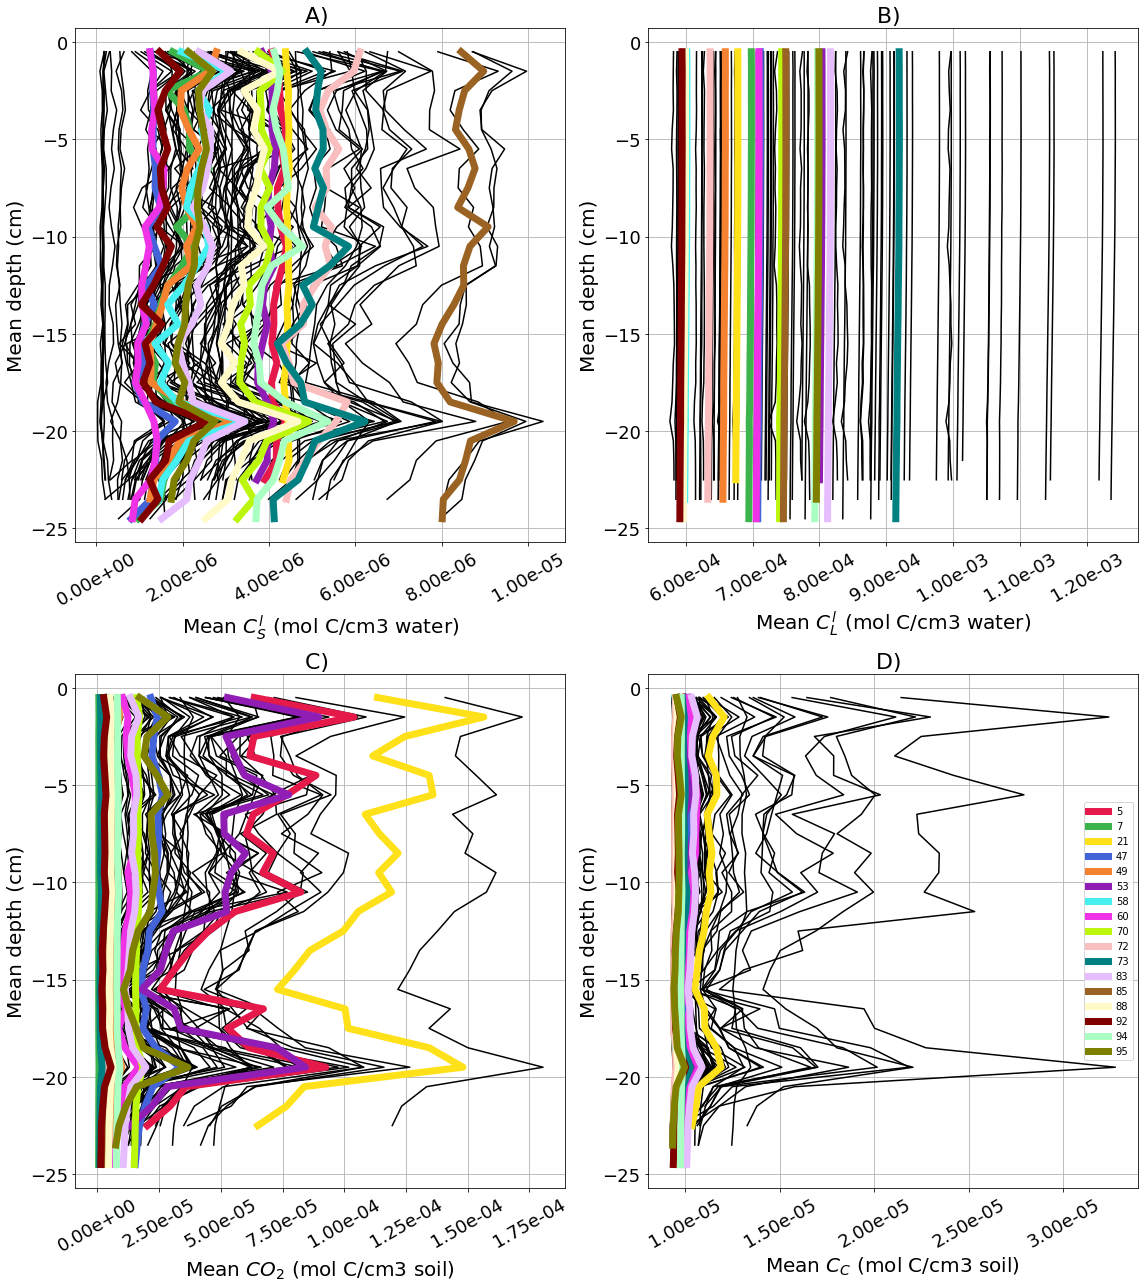

In [143]:

import matplotlib.colors as mcolors
# Define a list of 17 distinct colors
colors = [
    "#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231",
    "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe",
    "#008080", "#e6beff", "#9a6324", "#fffac8", "#800000",
    "#aaffc3", "#808000"
]

# Create a ListedColormap using the defined colors
cmap = mcolors.ListedColormap(colors)

# Create a scalar mappable for displaying the colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=16))

colvars =None# 'CS_init'
df3D25gotR['vol']=df3D25gotR['volscv']
idsplot = [1,2,3,4]
units = [ 'mol C/cm3 water','mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cs': '$C_S^l$','cl': '$C_L^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cs','cl','co2','cc']): #(['CHl','css','cs_/css']):
    bin_and_plot(df3D25gotR, 'depth', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 colVar= colvars, 
                 unit = units[nn],keeplim=False,
                xlabels=xlabels,colorlist = colors,
                mysets=list_survivors
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99set.png')
plt.show()

In [144]:
colvars = 'CS_init'
dfa['height'] = dfa['yZ']
mg_per_mol = 12.011 *1000 # g/mol

solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
solidMolarMass = 60.08e-3 # [kg/mol] 

# theta_r, theta_s, alpha, n, Ks
soil =  [0.08, 0.43, 0.04, 1.6, 50]#[0.045, np.nan, 0.04, 1.6, 50]

# [mol / m3 solid] =[kg/m^3 solid] / [kg/mol] 
solidMolDensity = solidDensity/solidMolarMass
# [mol / m3 scv] = [mol / m3 solid] * [m3 solid /m3 space]
bulkDensity_m3 = solidMolDensity*(1.- soil[1])
bulkDensity_cm3 = bulkDensity_m3 / 1e6 # [mol / cm3 scv] 
# g soil/cm3 soil
solidDensity_gcm3 = solidDensity/1e6*1000 # [kg/m^3 solid] * [m3/cm3] * [g/kg]
dfa['CLl']=dfa['cs_']#*dfa['vol']
dfa['cs_/css']=dfa['cs_']/dfa['css']
idsplot = [1,2,3,4]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'CLl': '$C_L^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
dfa_ = dfa#[dfa['pSet']!='19'].copy()
for nn, dep in enumerate(['CLl','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(dfa_, 'height', dep, 50,
                2,2, idsplot[nn], 
                 colVar= colvars, unit = units[nn],
                 keeplim=False,colorlist = colors,
                xlabels=xlabels)#[nn])
    
plt.show()

NameError: name 'dfa' is not defined

In [145]:

idsplot = [1,2,3,4]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cod': '$C_O^d$','ccd': '$C_C^d$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['co','cod','cc','ccd']): #(['CLl','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(df3D25gotR, 'depth', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 colVar= colvars, 
                 unit = units[nn],keeplim=False,colorlist = colors,
                xlabels=xlabels,mysets=list_survivors
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99set2.png')
plt.show()

KeyError: 'CS_init'

<Figure size 1152x1296 with 0 Axes>

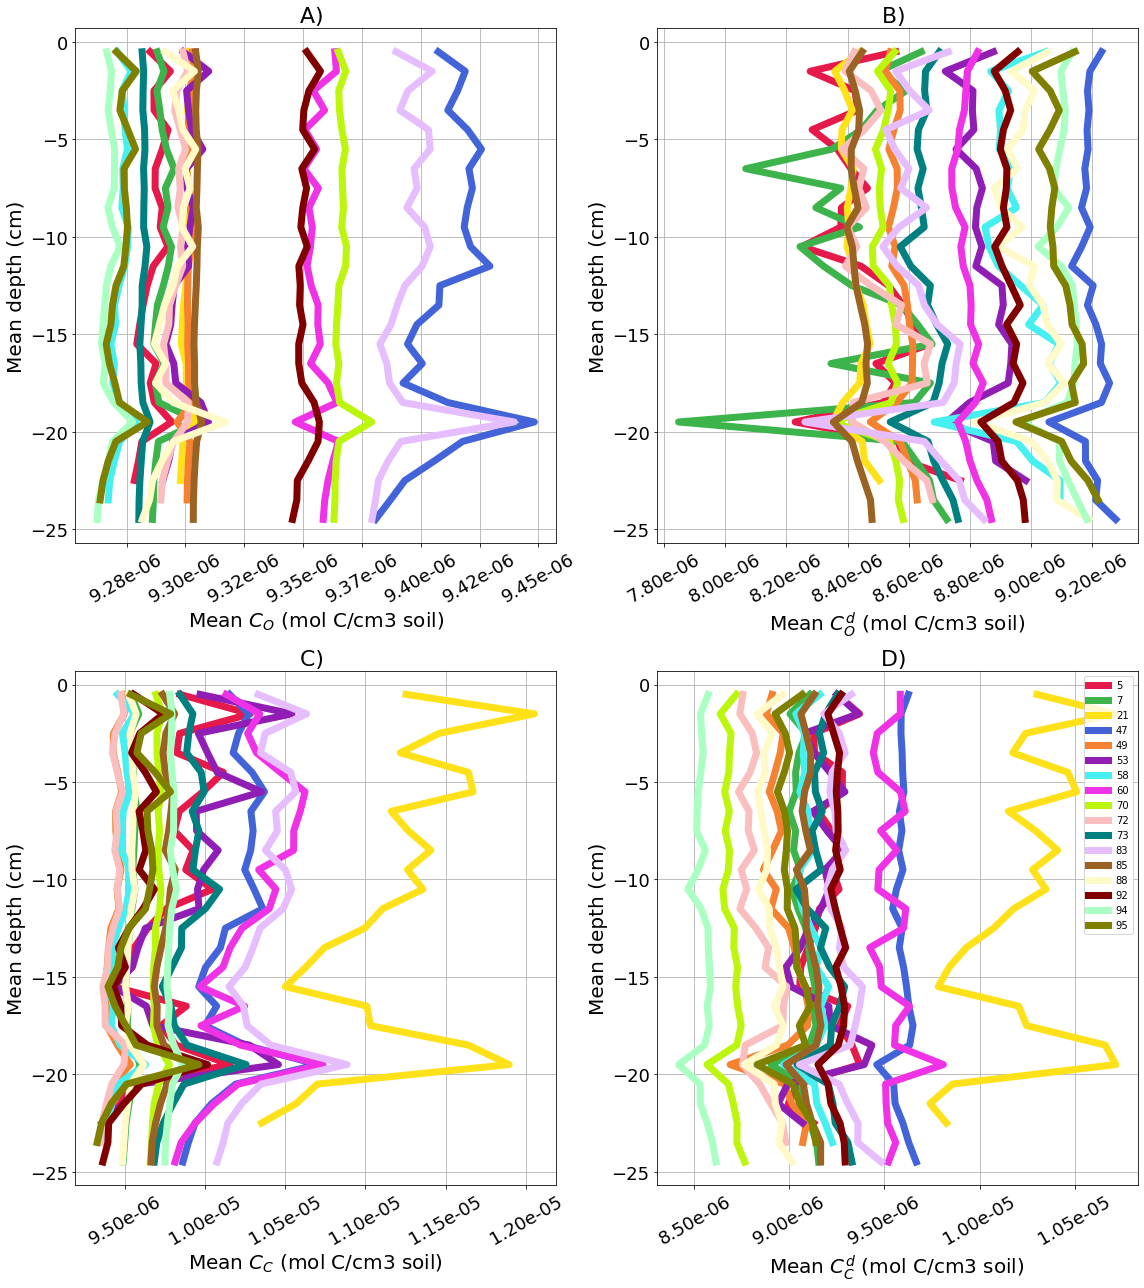

In [148]:
dftemp = df3D25gotR[np.array([ii  in survivorSets for ii in list(df3D25gotR['pSet'])])]
idsplot = [1,2,3,4]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cod': '$C_O^d$','ccd': '$C_C^d$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['co','cod','cc','ccd']): #(['CLl','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(dftemp, 'depth', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 colVar= None, 
                 unit = units[nn],keeplim=False,colorlist = colors,
                xlabels=xlabels,mysets=list_survivors
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99set2.png')
plt.show()

index  time  cellindx     theta            cs        cl  \
0      16539263  14.0       580  0.229098  9.732398e-07  0.000694   
2      16563743  14.0       580  0.229089  1.051673e-06  0.000591   
3      16590239  14.0       581  0.229087  8.012607e-06  0.000746   
4      16607807  14.0       582  0.229099  8.086368e-07  0.000708   
6      16611551  14.0       582  0.229096  8.345451e-07  0.000705   
...         ...   ...       ...       ...           ...       ...   
15644  41623775  14.0      1459  0.210812  8.361251e-06  0.000749   
15646  41624639  14.0      1459  0.210846  3.048119e-06  0.000600   
15650  41625791  14.0      1459  0.210821  1.424898e-06  0.000594   
15652  41626367  14.0      1459  0.210813  4.032941e-06  0.000797   
15653  41626655  14.0      1459  0.210889  1.891391e-06  0.000799   

                coa       cod           cca       ccd  ...  gotR  pSet  depth  \
0      5.613209e-07  0.000009  3.363961e-07  0.000009  ...  True     7  -24.5   
2      3.653242e-07  0.000009  7.124052e-08  0.000009  ...  True    92  -24.5   
3      8.233288e-07  0.000008  5.008659e-07  0.000009  ...  True    85  -24.5   
4      1.040976e-07  0.000009  1.954158e-07  0.000010  ...  True    47  -24.5   
6      4.883560e-07  0.000009  2.934901e-07  0.000010  ...  True    60  -24.5   
...             ...       ...           ...       ...  ...   ...   ...    ...   
15644  8.251881e-07  0.000008  5.042948e-07  0.000009  ...  True    85   -0.5   
15646  1.662255e-07  0.000009  4.783245e-07  0.000009  ...  True    88   -0.5   
15650  3.664116e-07  0.000009  7.589571e-08  0.000009  ...  True    92   -0.5   
15652  8.289757e-08  0.000009  1.139157e-06  0.000009  ...  True    94   -0.5   
15653  4.492960e-08  0.000009  2.007656e-07  0.000009  ...  True    95   -0.5   

             coordX  coordY  simulation  volscv        cc        co  vol  
0      8.673617e-17    -4.5           7       1  0.000009  0.000009    1  
2      8.673617e-17    -4.5          92       1  0.000009  0.000009    1  
3      1.000000e+00    -4.5          85       1  0.000010  0.000009    1  
4     -1.000000e+00    -3.5          47       1  0.000010  0.000009    1  
6     -1.000000e+00    -3.5          60       1  0.000010  0.000009    1  
...             ...     ...         ...     ...       ...       ...  ...  
15644  8.673617e-17     0.5          85       1  0.000010  0.000009    1  
15646  8.673617e-17     0.5          88       1  0.000009  0.000009    1  
15650  8.673617e-17     0.5          92       1  0.000009  0.000009    1  
15652  8.673617e-17     0.5          94       1  0.000010  0.000009    1  
15653  8.673617e-17     0.5          95       1  0.000009  0.000009    1  

[2871 rows x 23 columns]

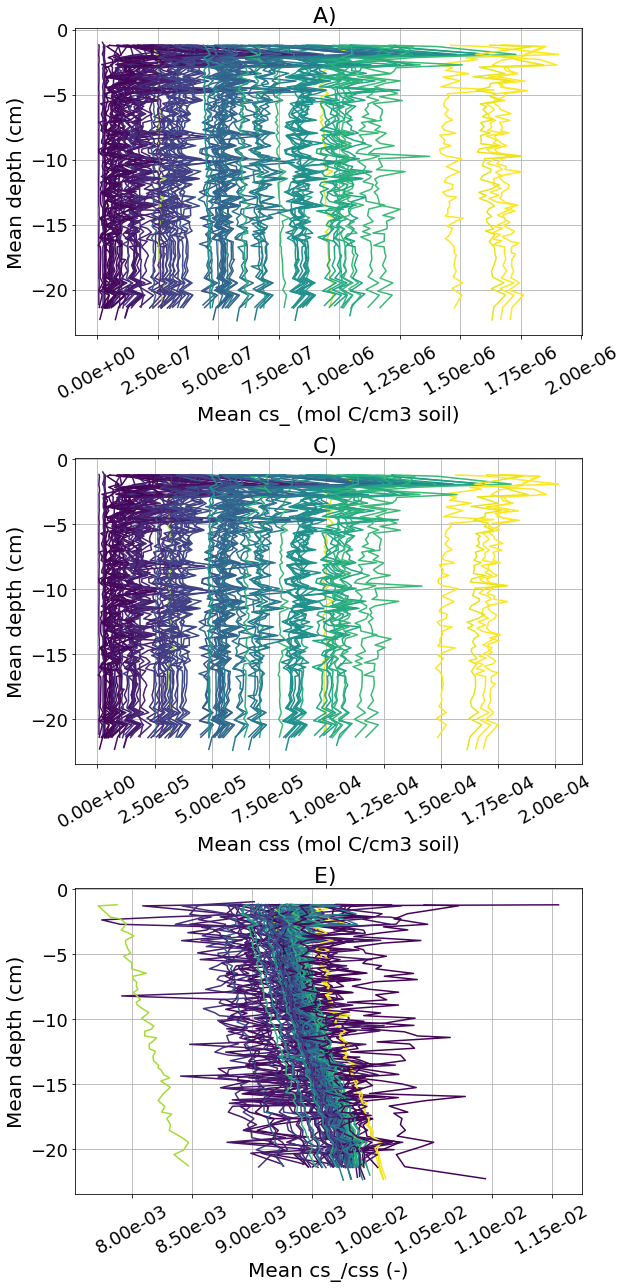

In [35]:
colvars = 'CS_init'
dfa['height'] = dfa['yZ']
mg_per_mol = 12.011 *1000 # g/mol

solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
solidMolarMass = 60.08e-3 # [kg/mol] 

# theta_r, theta_s, alpha, n, Ks
soil =  [0.08, 0.43, 0.04, 1.6, 50]#[0.045, np.nan, 0.04, 1.6, 50]

# [mol / m3 solid] =[kg/m^3 solid] / [kg/mol] 
solidMolDensity = solidDensity/solidMolarMass
# [mol / m3 scv] = [mol / m3 solid] * [m3 solid /m3 space]
bulkDensity_m3 = solidMolDensity*(1.- soil[1])
bulkDensity_cm3 = bulkDensity_m3 / 1e6 # [mol / cm3 scv] 
# g soil/cm3 soil
solidDensity_gcm3 = solidDensity/1e6*1000 # [kg/m^3 solid] * [m3/cm3] * [g/kg]

#dfa['cs_'] = dfa['cs']*dfa['theta']*mg_per_mol/solidDensity_gcm3
dfa['cl_'] = dfa['cl']*dfa['theta']#*mg_per_mol/solidDensity_gcm3
dfa['css'] = dfa['css2']#*mg_per_mol/solidDensity_gcm3
#dfa['cs_/css']=dfa['cs_']/dfa['css']
idsplot = [1,3,5]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','-']
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cs_','css','cs_/css']):
    bin_and_plot(dfa, 'height', dep, 100,
                 3, 2, idsplot[nn], 
                 colVar= colvars, 
                 unit = units[nn],keeplim=False)#[nn])
    

plt.show()

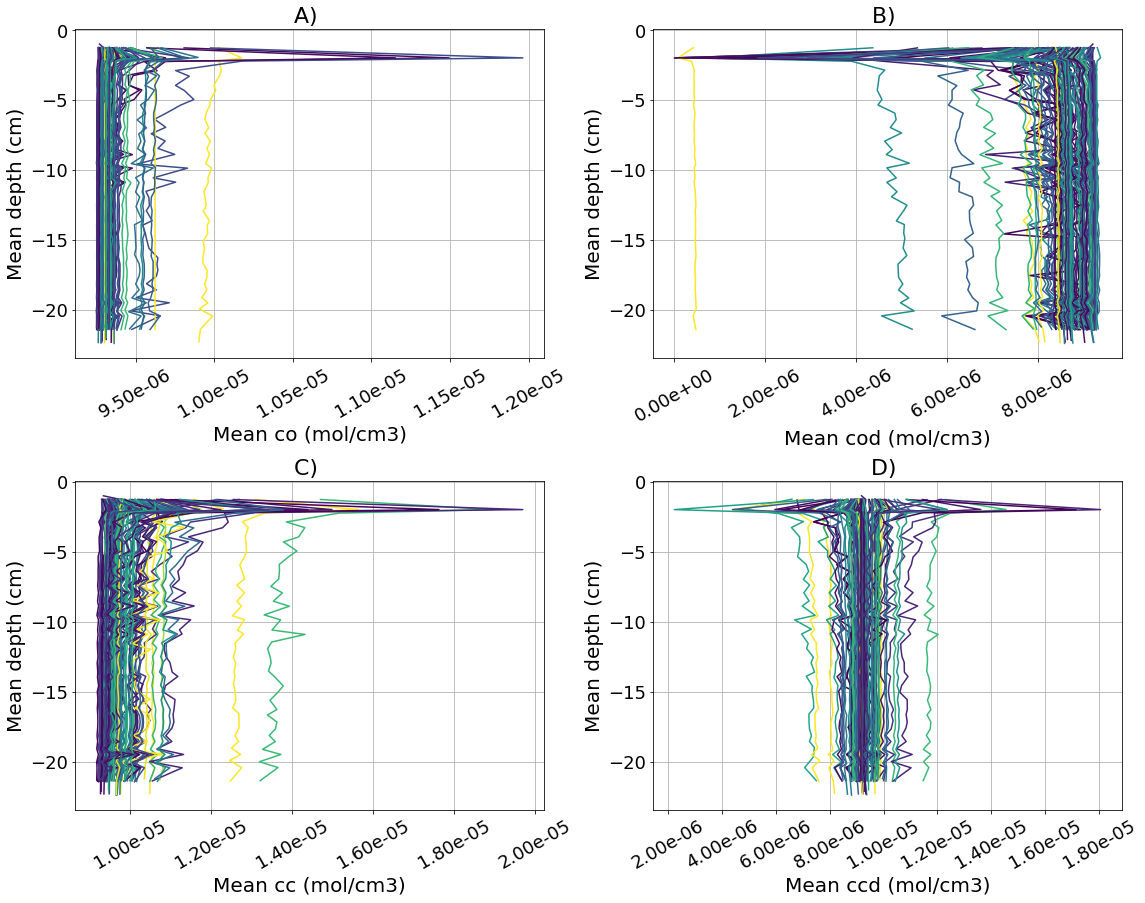

In [36]:
colvars = 'CS_init'

idsplot = [1,2,3,4]
plt.figure(figsize=(8*2, 6*4))
for nn, dep in enumerate(['co','cod','cc','ccd']):
    bin_and_plot(dfa, 'height', dep, 50,
                 4, 2, idsplot[nn], keeplim=False,
                 colVar= colvars)#[nn])
    

plt.show()

KeyError: 'height'

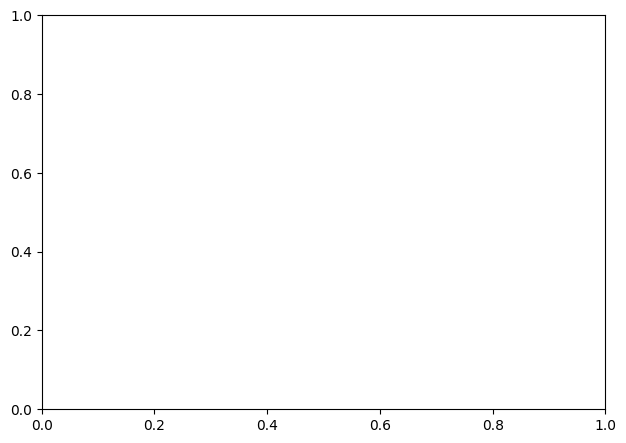

In [336]:
colvars = None#'CS_init'

idsplot = [1,2,3,4]
plt.figure(figsize=(8*2, 6*4))
for nn, dep in enumerate(['co','cod','cc','ccd']):
    bin_and_plot(dfa, 'height', dep, 50,
                 4, 2, idsplot[nn], keeplim=False,
                 mysets=[17,38,44,85],#pSet2Keep,
                 colVar= colvars
                )#[nn])
    

plt.show()

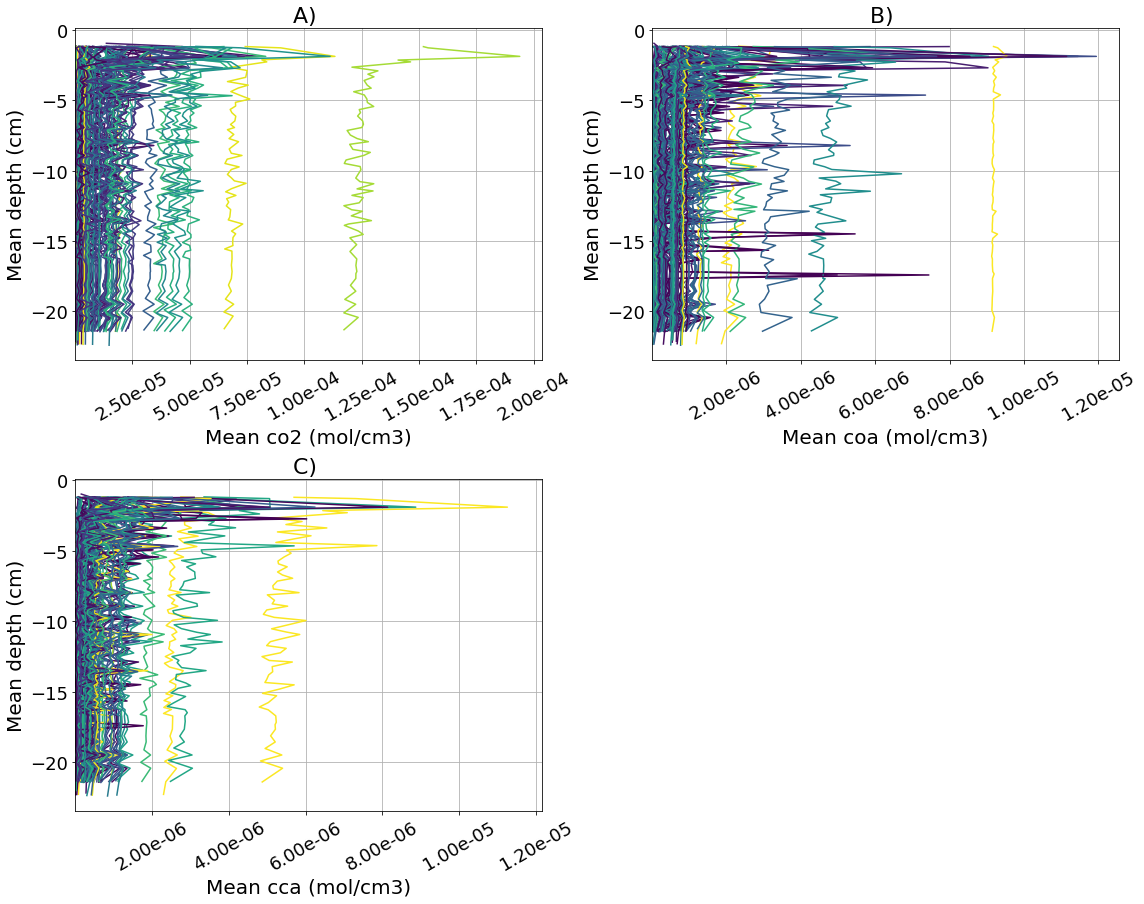

In [38]:
colvars ='CS_init'

idsplot = [1,2,3,4]
plt.figure(figsize=(8*2, 6*4))
for nn, dep in enumerate(['co2','coa','cca']):
    bin_and_plot(dfa, 'height', dep, 100,
                 4, 2, idsplot[nn],
                 colVar= colvars)#[nn])
    

plt.show()

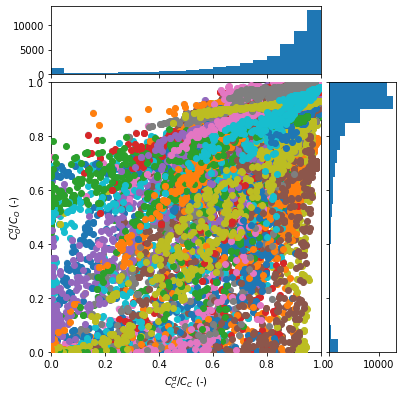

In [14]:
def scatter_hist(x, y,sets, ax, ax_histx, ax_histy,extra_val=None):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    
    ax.scatter(x, y,
               #c=df['vol'],
               alpha=0.3, edgecolors ='none')
 
    for vall in extra_val:#pSet2Keep:
        is5x = x[np.where(sets == vall)[0] ] # Select subset where 'pSet' equals the current value
        is5y = y[np.where(sets == vall)[0] ] # Select subset where 'pSet' equals the current value
        col = (0.0, 0.0, 0.0)
        ax.scatter(is5x, is5y, alpha=1, 
                    zorder=100,label=f'{vall}'#color_map[value]
                   )
    # now determine nice limits by hand:
    binwidth = 0.05
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth
    #ax.legend( bbox_to_anchor=(1.7, 1))
    bins = np.arange(-lim, lim + binwidth, binwidth)
    
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
# Start with a square Figure.


fig = plt.figure(figsize=(6, 6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])

ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#plt.title(chr(ord('@')+2)+") ")
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax.set_xlabel('$C_C^d/C_C$ (-)')
ax.set_ylabel('$C_O^d/C_O$ (-)')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# Draw the scatter plot and marginals.
scatter_hist((dfa['ccd'])/dfa['cc'],(dfa['cod'])/dfa['co'], 
             dfa['pSet'], ax, ax_histx, 
             ax_histy,df["pSet"].unique())


[]

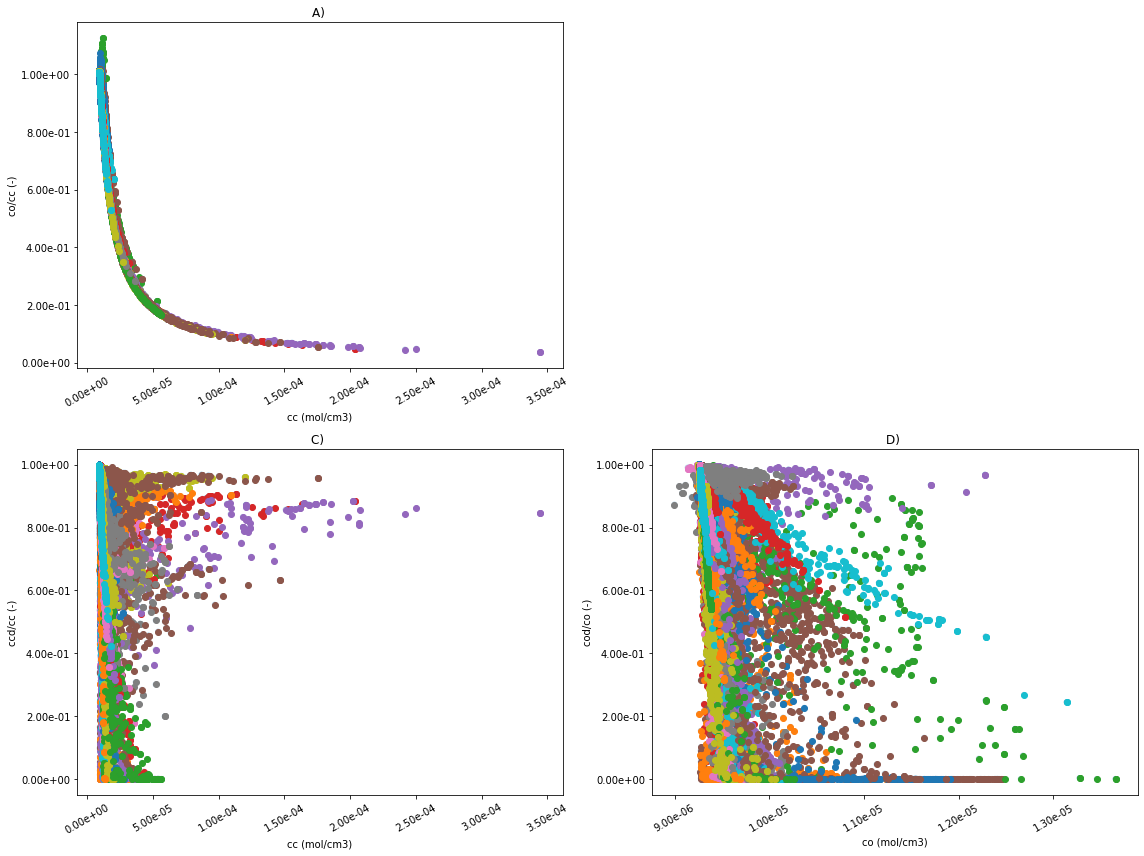

In [15]:
pSet2Keep = df["pSet"].unique()


plt.figure(figsize=(8*2, 6*2))
plt.subplot(2, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)

df=dfa
plt.scatter((df['cc']),(df['co'])/df['cc'], #np.log(df['cc']),np.log(df['co']), 
            #c=df['pSet'],
            alpha=0.3, edgecolors ='none')
for vall in pSet2Keep:
    subset = df[df['pSet'] == vall]  # Select subset where 'pSet' equals the current value
    plt.scatter((subset['cc']),(subset['co'])/subset['cc'], alpha=1, 
                zorder=100,label=f'{vall}'
               )
    ##plt.legend()
    
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title(nn)
#plt.colorbar()
plt.xlabel('cc (mol/cm3)')
plt.ylabel('co/cc (-)')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.xticks(rotation=30)


plt.subplot(2, 2, 3)
plt.title(chr(ord('@')+3)+") ")#+colVar)
plt.scatter((df['cc']),(df['ccd'])/df['cc'], #np.log(df['cc']),np.log(df['co']), 
            #c=df['pSet'],
            alpha=0.3, edgecolors ='none')
for vall in pSet2Keep:
    subset = df[df['pSet'] == vall]  # Select subset where 'pSet' equals the current value
    
    plt.scatter((subset['cc']),(subset['ccd'])/subset['cc'], alpha=1, 
                zorder=100,label=f'{vall}'
               )
    ##plt.legend()
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title(nn)
#plt.colorbar()
plt.xlabel('cc (mol/cm3)')
plt.ylabel('ccd/cc (-)')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.xticks(rotation=30)

#plt.legend()
plt.subplot(2, 2, 4)
plt.title(chr(ord('@')+4)+") ")#+colVar)

plt.scatter((df['co']),(df['cod'])/df['co'], #np.log(df['cc']),np.log(df['co']), 
            #c=df['pSet'],
            alpha=0.3, edgecolors ='none')
for vall in pSet2Keep:
    subset = df[df['pSet'] == vall]  # Select subset where 'pSet' equals the current value
    plt.scatter((subset['co']),(subset['cod'])/subset['co'], alpha=1, 
               zorder=100,label=f'{vall}'
               )
    ##plt.legend()
    
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title(nn)
#plt.colorbar()
plt.xlabel('co (mol/cm3)')
plt.ylabel('cod/co (-)')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.xticks(rotation=30)

plt.tight_layout()
plt.plot()

In [41]:
print(len(set( df['pSet'].unique())-psetCaCxa),
len(set( df['pSet'].unique())- psetCaCxa-pSethighCoCc))

90 90


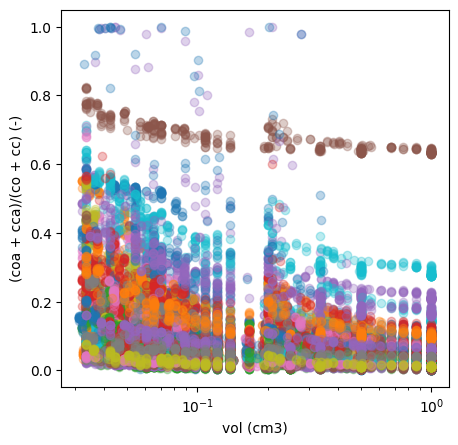

In [42]:
df = dfa
unique_values =set( df['pSet'].unique())#-psetCaCxa
#unique_values.add(57)
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    #col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cxa']/subset['cx'], alpha=0.3, 
               label=str(value)#, c = col
               )#color_map[value])

# Add labels and legend
plt.xscale('log')
plt.xlabel('vol (cm3)')
plt.ylabel('(coa + cca)/(co + cc) (-)')
##plt.legend(ncol=2, bbox_to_anchor=(1.02, 1))
plt.show()

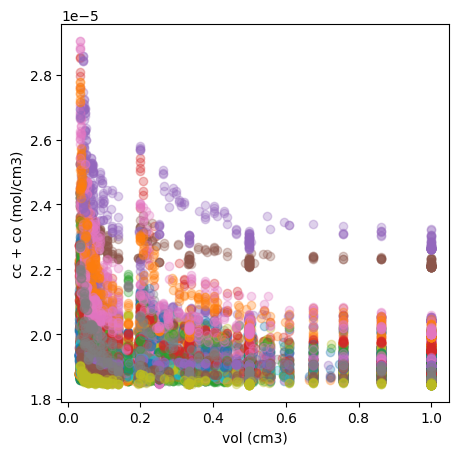

In [43]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cc'] + subset['co'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cc + co (mol/cm3)')
##plt.legend(ncol=2)
plt.show()

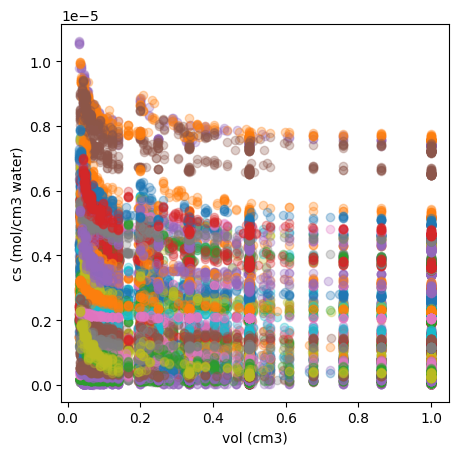

In [44]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc-pSethighC
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cs'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs (mol/cm3 water)')
##plt.legend(ncol=2)

plt.show()

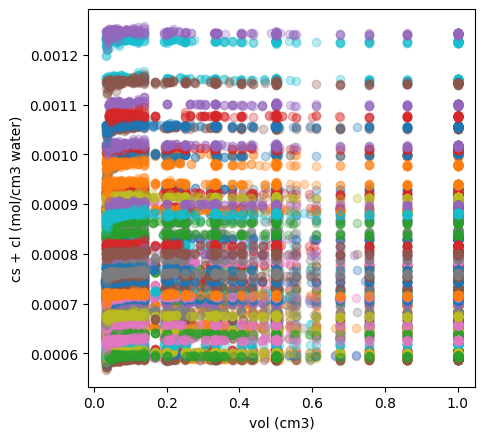

In [45]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc-pSethighC
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cs']+subset['cl'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs + cl (mol/cm3 water)')
##plt.legend(ncol=3)
plt.show()


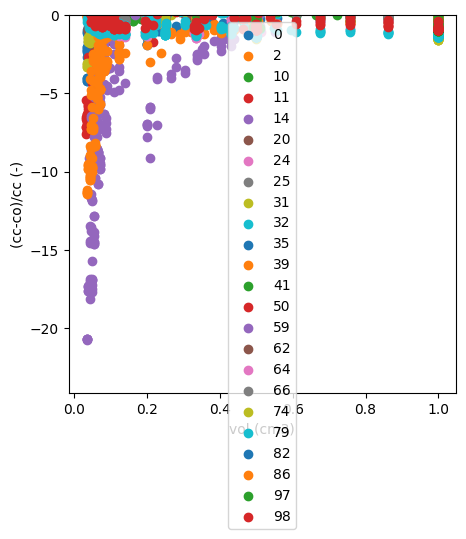

In [46]:

df=dfa#[]
unique_values =pSethighCoCcBis
#- psetCaCxa-pSethighCoCc-pSethighC-pSethighCoCcBis
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value].copy()  # Select subset where 'pSet' equals the current value
    subset['cc-co']= subset['cc']-subset['co']
    mehrCo = subset[subset['cc-co']<0]
    col = colors.to_hex(color_map[value])
    #print('pset',value, min(subset['cc-co']/subset['cc']))
    plt.scatter(subset['vol'], subset['cc-co']/subset['cc']*100, #alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])

# Add labels and legend
plt.ylim(top=0)
plt.xlabel('vol (cm3)')
plt.ylabel('(cc-co)/cc (-)')
plt.legend()
plt.show()


In [47]:
len(set( df['pSet'].unique())- set(psetCaCxa)-set(pSethighCoCc)-set(pSetLowCoCc)-set(pSethighC)-set(pSethighCoCcBis))

70

In [48]:
psetCaCxa

{9, 14, 15, 24, 29, 36, 39, 43, 50}

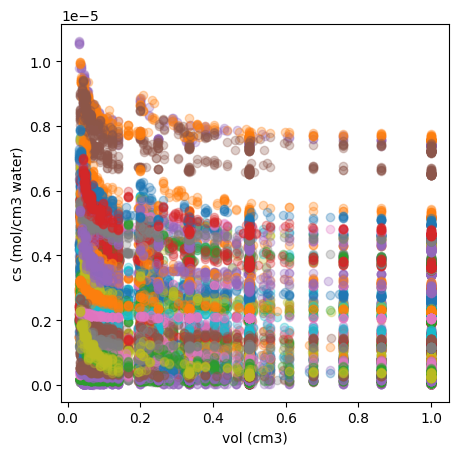

In [49]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc-pSethighC-pSethighCoCcBis
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cs'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs (mol/cm3 water)')
##plt.legend(ncol=2)

plt.show()

NameError: name 'randrange' is not defined

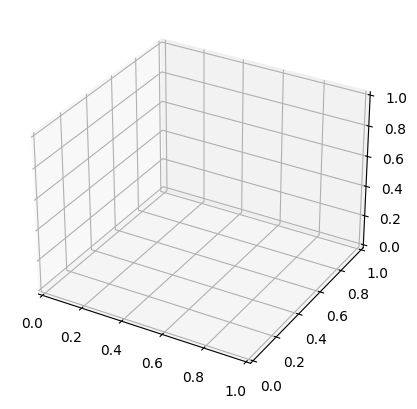

In [50]:
df = dfa
unique_values = set( df['pSet'].unique())#
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
unique_values = unique_values #- set([57,74])#.add(57)
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

df['cs_/css']=df['cs_']/df['css']
for value in unique_values:
    subset = dfa[dfa['pSet'] == value].copy()  # Select subset where 'pSet' equals the current value
    subset['cc-co']= subset['cc']-subset['co']
    print(value,np.mean(subset['cxa_cx']),np.max(subset['cxa_cx']), 
          np.mean(subset['cs_/css']), np.mean(subset['cs']))

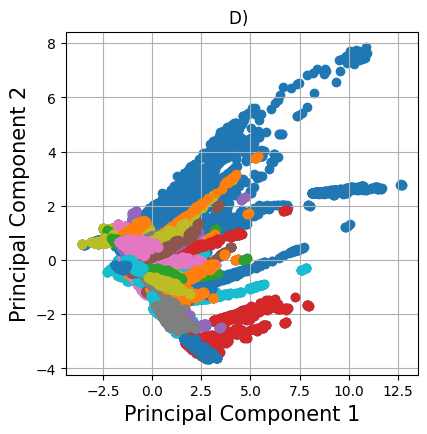

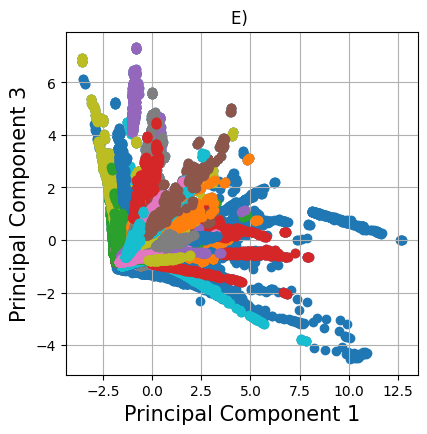

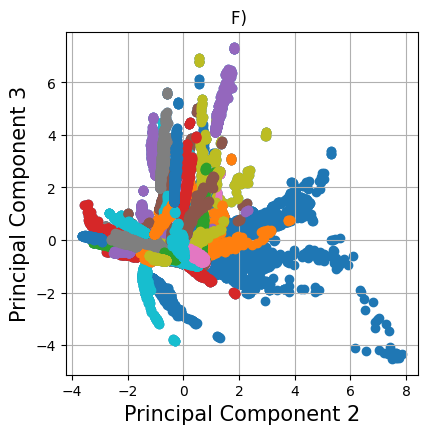

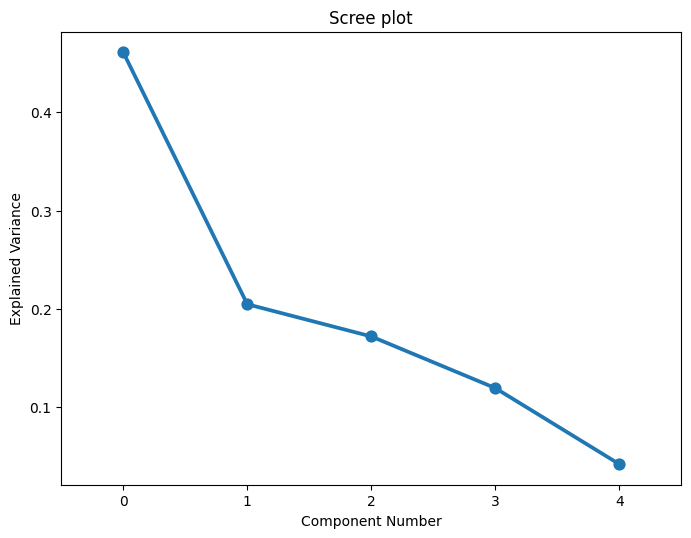

In [308]:
import matplotlib.ticker as mtick
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib.markers as markers

import matplotlib.markers as markers

# Get a list of all available markers
marker_list = list(markers.MarkerStyle.markers.keys())

outputvalsname =  ['cs','coa','cod','cca','ccd','co2','css2']# 'co','cc',#'cl',
takeOut =[]


selectedSets = (set( df['pSet'].unique())-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

# Separating out the features
x = dfa[outputvalsname]

# Separating out the target
y = df['pSet']
target = df['pSet']# pd.DataFrame(data = y , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target] , axis = 1)
#finalDf['outlier'] = [idd in np.array([1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]) 
#                      for idd in finalDf['pSet']]

numMarker=13
numCol = 8

marker_id =np.array( [[i]*numCol for i in range(numMarker)]).reshape(-1)[:99]
color_id  =np.array( [[i for i in range(numCol)]*numMarker]).reshape(-1)[:99]

pSet2mark = dict(zip(np.unique(df['pSet']), marker_id))
pSet2col = dict(zip(np.unique(df['pSet']), color_id))
markers_map = dict(zip(np.array([i for i in range(numMarker)]),marker_id))
markers_map2markers_list = dict(zip(markers_map,marker_list))


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))

finalDf['color'] = finalDf['pSet'].map(pSet2col).map(color_map)


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,1)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

#for pset in range(99):

#    subset = finalDf[finalDf['pSet']==pset]
#    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           #, c = subset['color'] 
           #, marker= markers_map2markers_list[pSet2mark[pset]]
           )

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               #, marker= markers_map2markers_list[pSet2mark[pset]]
               )
    #plt.legend()
        
ax.set_title(chr(ord('@')+4)+") ")
ax.grid()# the one near 30 is no 74

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,2)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

#for pset in range(99):
#    subset = finalDf[finalDf['pSet']==pset]
#    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 3']

           #, c = subset['color'] 
           #, marker= markers_map2markers_list[pSet2mark[pset]]
           )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 3'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               #, marker= markers_map2markers_list[pSet2mark[pset]]
               )
    #plt.legend()
        
ax.set_title(chr(ord('@')+5)+") ")
ax.grid()# the one near 30 is no 74

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,3)#projection='3d') 
        
ax.set_title(chr(ord('@')+6)+") ")
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

#subset = finalDf[finalDf['pSet']==pset]
#if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
ax.scatter(finalDf[ 'principal component 2']
           , finalDf['principal component 3']
           #, c = subset['color'] 
           #, marker= markers_map2markers_list[pSet2mark[pset]]
           )

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 2']
               , subset['principal component 3'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               #, marker= markers_map2markers_list[pSet2mark[pset]]
               )
    ##plt.legend()

ax.grid()# the one near 30 is no 74
plt.show()
n_components = 5
 
# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(x)


# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [52]:
finalDf[finalDf['principal component 2']>20]

Empty DataFrame
Columns: [principal component 1, principal component 2, principal component 3, pSet, color]
Index: []

In [70]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.46104997 0.20477145 0.17200251] 0.8378239305171358


NameError: name 'randrange' is not defined

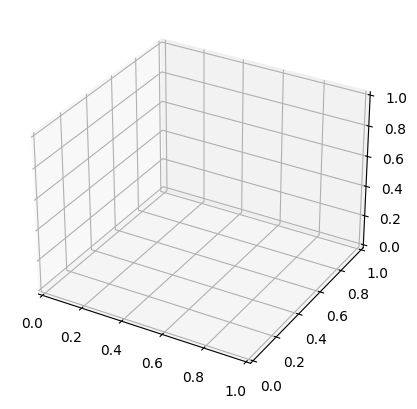

In [54]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

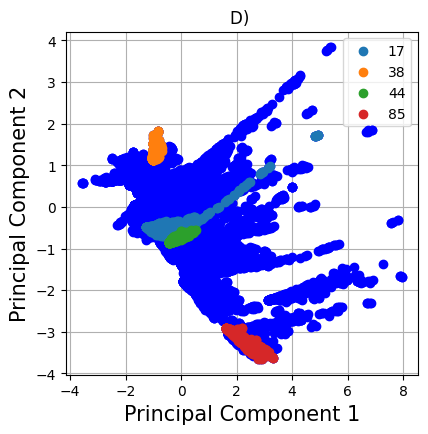

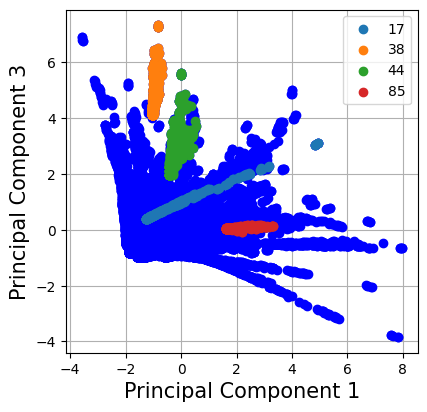

In [422]:

# Get a list of all available markers
#marker_list = list(markers.MarkerStyle.markers.keys())

outputvalsname =  ['cs','coa','cod','cca','ccd','co2', 'css2']# 'co','cc',#'cl',
takeOut =[]


selectedSets = (set( df['pSet'].unique())-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)


# Separating out the features
x = dfa[outputvalsname]

# Separating out the target
y = df['pSet']
target = df['pSet']# pd.DataFrame(data = y , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target] , axis = 1)
#finalDf['outlier'] = [idd in np.array([1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]) 
#                      for idd in finalDf['pSet']]

numMarker=13
numCol = 8

#marker_id =np.array( [[i]*numCol for i in range(numMarker)]).reshape(-1)[:99]
color_id  =np.array( [[i for i in range(numCol)]*numMarker]).reshape(-1)[:99]

pSet2mark = dict(zip(np.unique(df['pSet']), marker_id))
pSet2col = dict(zip(np.unique(df['pSet']), color_id))
#markers_map = dict(zip(np.array([i for i in range(numMarker)]),marker_id))
#markers_map2markers_list = dict(zip(markers_map,marker_list))


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))

finalDf['color'] = finalDf['pSet'].map(pSet2col).map(color_map)


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,1)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

#for pset in range(99):

#    subset = finalDf[finalDf['pSet']==pset]
#    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
if False:
    ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           , c = subset['color'] 
           , marker= markers_map2markers_list[pSet2mark[pset]]
           )

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                c ='b',# subset['color'] ,
               alpha=1, 
           zorder=100,#label=f'{pset}',
               )
for pset in  [17,38,44,85 ]:#[15,17,21,27,38,44,85]:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               )
    plt.legend()

ax.set_title(chr(ord('@')+4)+") ")
ax.grid()# the one near 30 is no 74

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,2)#projection='3d') 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 3'],
                c ='b',# subset['color'] ,
               alpha=1, 
           zorder=100,#label=f'{pset}',
               )
for pset in [17,38,44,85 ]:#[15,17,21,27,38,44,85]:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 3'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               )
    plt.legend()

if False:
    #for pset in range(99):
    #    subset = finalDf[finalDf['pSet']==pset]
    #    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
    if False:
        ax.scatter(finalDf[ 'principal component 1']
               , finalDf['principal component 3']

               , c = subset['color'] 
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )
            #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")

    for pset in selectedSets:
        subset = finalDf[finalDf['pSet']==pset]
        ax.scatter(subset[ 'principal component 1']
                   , subset['principal component 3'],
                    #c = subset['color'] ,
                   alpha=1, 
               zorder=100,label=f'{pset}'
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #plt.legend()

    ax.set_title(chr(ord('@')+5)+") ")
    ax.grid()# the one near 30 is no 74

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(2,2,3)#projection='3d') 

    ax.set_title(chr(ord('@')+6)+") ")
    ax.set_xlabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)

    #subset = finalDf[finalDf['pSet']==pset]
    #if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
    if False:
        ax.scatter(finalDf[ 'principal component 2']
               , finalDf['principal component 3']
               , c = subset['color'] 
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )

    for pset in selectedSets:
        subset = finalDf[finalDf['pSet']==pset]
        ax.scatter(subset[ 'principal component 2']
                   , subset['principal component 3'],
                    #c = subset['color'] ,
                   alpha=1, 
               zorder=100,label=f'{pset}'
                   #, marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        ##plt.legend()

ax.grid()# the one near 30 is no 74
plt.show()

In [423]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.46104997 0.20477145 0.17200251] 0.8378239305171362


In [57]:
import statistics
midpc1 = statistics.median(finalDf['principal component 1'])
print(midpc1)
midpc2 = statistics.median(finalDf['principal component 2'])
print(midpc2)

-0.34791496177510595
0.11207948167406462


In [58]:
dists = []
finalDf['dists']=np.nan
for psets in selectedSets:
    subset = finalDf[finalDf['pSet']==psets]
    dist = ((subset['principal component 1']-midpc1)**2 + 
           (subset['principal component 2']-midpc2)**2)**(1/2)
    finalDf.loc[finalDf['pSet']==psets, 'dists'] = np.mean(dist)

In [59]:
print(np.nanmax(finalDf['dists']),np.nanmin(finalDf['dists']))

5.187121344435788 0.4357315895246166


In [60]:
set(finalDf[
    (finalDf['dists'] == np.nanmin(finalDf['dists']) )]['pSet'])

{8}

In [312]:
set(finalDf[
    (finalDf[
        'principal component 2'] == min(finalDf['principal component 2'])
    )]['pSet'])

{85}

In [313]:
set(finalDf[
    (finalDf[
        'principal component 3'] == min(finalDf['principal component 3'])
    )]['pSet'])

{50}

In [62]:
(set(finalDf[
    (finalDf['principal component 2'] >2.9 )]['pSet'])-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

{12, 48}

In [63]:
(set(finalDf[
    (finalDf['principal component 1'] > 8 )]['pSet'])-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

set()

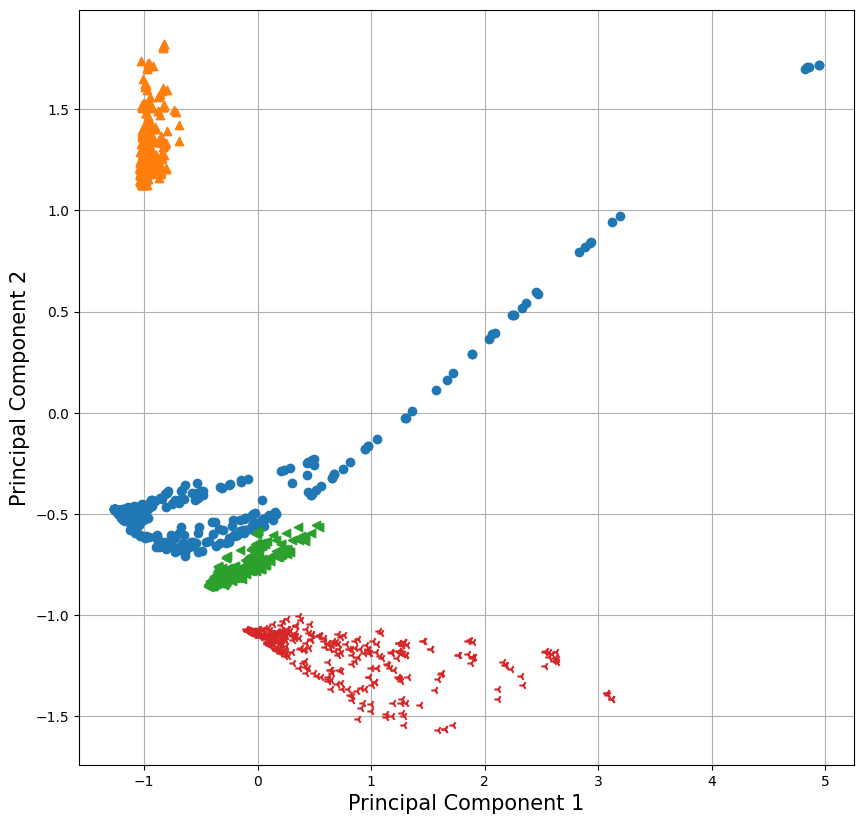

In [302]:

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
for pset in [17,38,44,73]:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )

ax.grid()# the one near 30 is no 74
plt.show()